In [32]:
import pandas as pd
import numpy as np

df = pd.read_csv(r"C:\Users\juanp\Downloads\10.000_Empresas_mas_Grandes_del_País_20251125.csv")
df.head(3)

,NIT,RAZÓN SOCIAL,SUPERVISOR,REGIÓN,DEPARTAMENTO DOMICILIO,CIUDAD DOMICILIO,CIIU,MACROSECTOR,INGRESOS OPERACIONALES,GANANCIA (PÉRDIDA),TOTAL ACTIVOS,TOTAL PASIVOS,TOTAL PATRIMONIO,Año de Corte
0,"899,999,068",ECOPETROL S.A,SUPERFINANCIERA,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA D.C.-BOGOTA D.C.,610,MINERO,$144.82,$33.41,$216.85,$125.81,$91.03,"2,022"
1,"900,112,515",REFINERIA DE CARTAGENA S.A.S,SUPERSOCIEDADES,Costa Atlántica,BOLIVAR,CARTAGENA-BOLIVAR,"1,921",MANUFACTURA,$27.86,$2.19,$42.84,$16.48,$26.36,"2,022"
2,"830,095,213",ORGANIZACIÓN TERPEL S.A.,SUPERFINANCIERA,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA D.C.-BOGOTA D.C.,"4,661",COMERCIO,$23.60,$0.33,$7.48,$4.47,$3.01,"2,022"


In [33]:
df[df.isnull().any(axis=1)]

,NIT,RAZÓN SOCIAL,SUPERVISOR,REGIÓN,DEPARTAMENTO DOMICILIO,CIUDAD DOMICILIO,CIIU,MACROSECTOR,INGRESOS OPERACIONALES,GANANCIA (PÉRDIDA),TOTAL ACTIVOS,TOTAL PASIVOS,TOTAL PATRIMONIO,Año de Corte
3532,"830,065,974",NaN,SUPERSOCIEDADES,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA D.C.-BOGOTA D.C.,"7,730",SERVICIOS,$0.06,-$0.02,$0.08,$0.10,-$0.02,"2,022"
13550,"830,065,974",NaN,SUPERSOCIEDADES,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA D.C.-BOGOTA D.C.,"7,730",SERVICIOS,$0.05,-$0.03,$0.08,$0.12,-$0.04,"2,021"


In [3]:
# Los únicos NaNs que hay son la Razón Social (el nombre) de dos empresas. No creo que merezca eliminar esas filas, solo le voy a poner el nombre de Faltante para identificarlas.
mask = df["RAZÓN SOCIAL"].isnull()
faltantes = [f"Faltante{i+1}" for i in range(mask.sum())]
df.loc[mask, "RAZÓN SOCIAL"] = faltantes

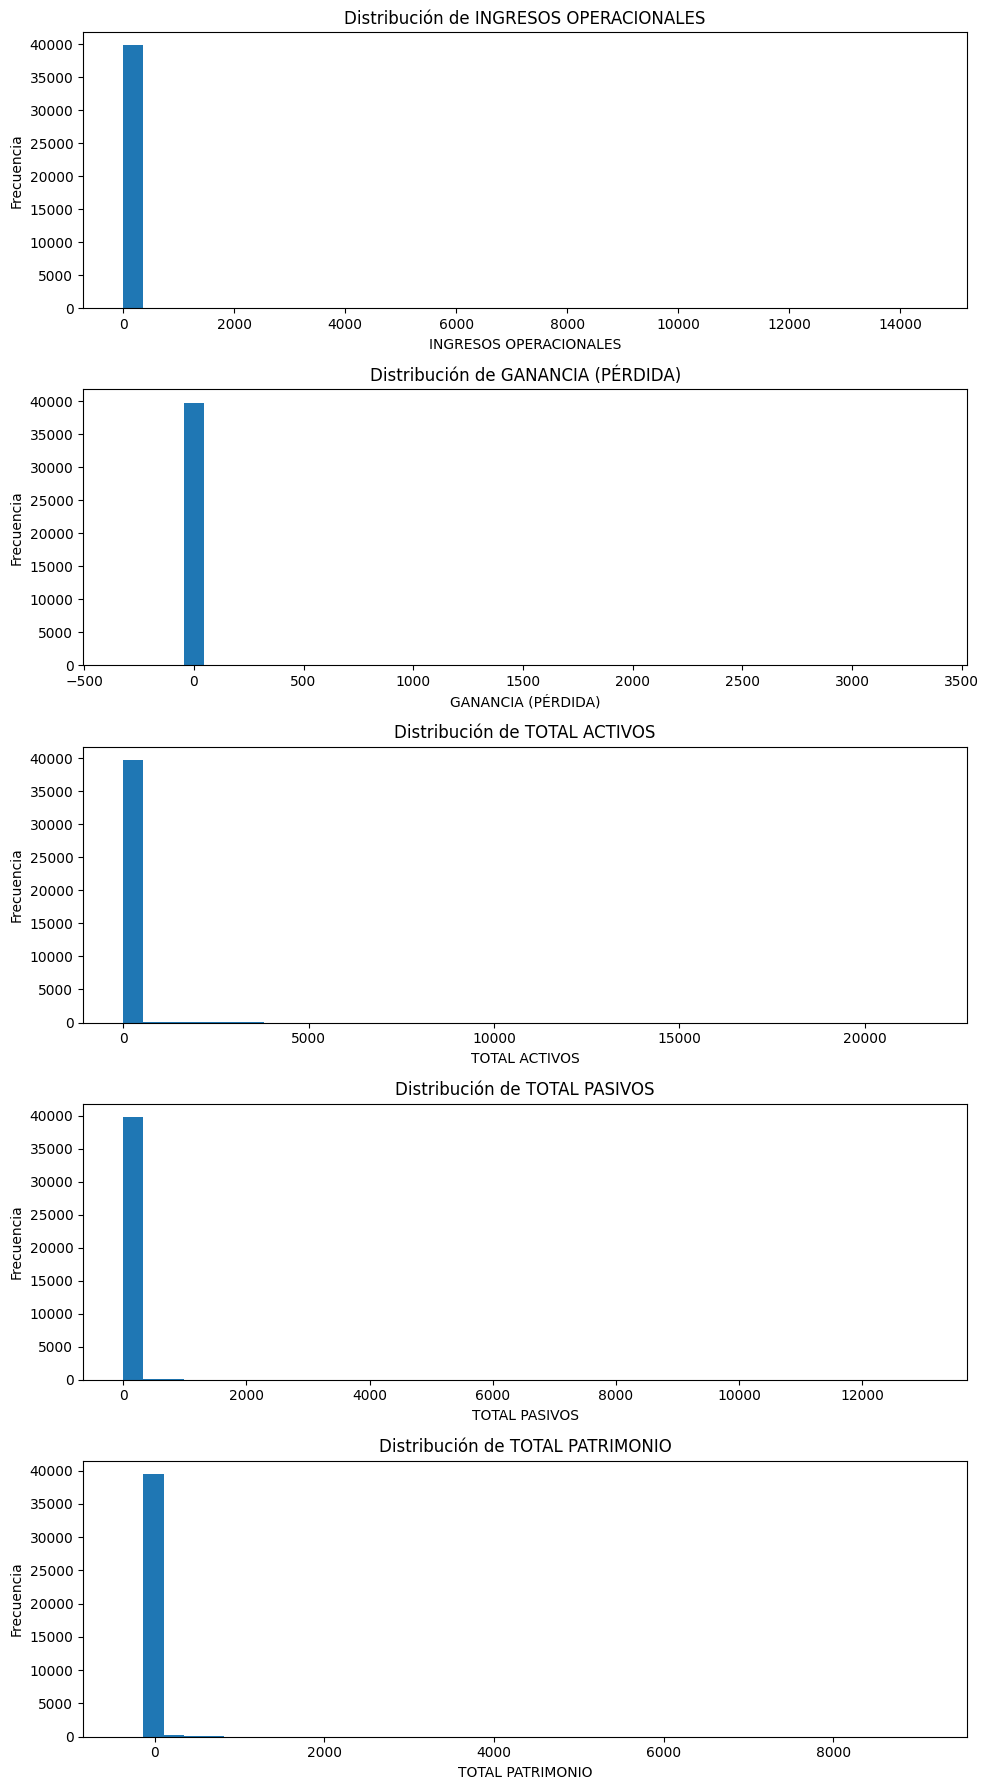

In [34]:
import matplotlib.pyplot as plt

cols = [
    "INGRESOS OPERACIONALES",
    "GANANCIA (PÉRDIDA)",
    "TOTAL ACTIVOS",
    "TOTAL PASIVOS",
    "TOTAL PATRIMONIO"
]

# Convertir a número
for c in cols:
    df[c] = df[c].astype(str)\
                 .str.replace("$", "", regex=False)\
                 .str.replace(".", "", regex=False)\
                 .str.replace(",", ".", regex=False)\
                 .astype(float)

plt.figure(figsize=(10, 18))

for i, col in enumerate(cols, 1):
    plt.subplot(5, 1, i)
    plt.hist(df[col], bins=40)
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()


In [35]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.boxplot(data=df[cols], orient="h")
plt.title("Boxplot de columnas financieras")
plt.show()


ModuleNotFoundError: No module named 'seaborn'

# Identificar Outliers

In [36]:
def detectar_outliers_iqr(df, cols):
    outliers_idx = set()
    for col in cols:
        if df[col].dropna().empty:
            continue
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        outliers = df[(df[col] < limite_inferior) | (df[col] > limite_superior)].index
        outliers_idx.update(outliers)
    return list(outliers_idx)

outlier_indices = detectar_outliers_iqr(df, cols)

df_outliers = df.loc[outlier_indices].copy()

print(f"Filas con outliers: {df_outliers['NIT'].unique().shape[0]} de {df['NIT'].unique().shape[0]} en todo el dataset -> = {df_outliers['NIT'].unique().shape[0] / df['NIT'].unique().shape[0] * 100:.2f}%")
df_outliers.head()


Filas con outliers: 3164 de 13976 en todo el dataset -> = 22.64%


,NIT,RAZÓN SOCIAL,SUPERVISOR,REGIÓN,DEPARTAMENTO DOMICILIO,CIUDAD DOMICILIO,CIIU,MACROSECTOR,INGRESOS OPERACIONALES,GANANCIA (PÉRDIDA),TOTAL ACTIVOS,TOTAL PASIVOS,TOTAL PATRIMONIO,Año de Corte
0,"899,999,068",ECOPETROL S.A,SUPERFINANCIERA,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA D.C.-BOGOTA D.C.,610,MINERO,14482.0,3341.0,21685.0,12581.0,9103.0,"2,022"
1,"900,112,515",REFINERIA DE CARTAGENA S.A.S,SUPERSOCIEDADES,Costa Atlántica,BOLIVAR,CARTAGENA-BOLIVAR,"1,921",MANUFACTURA,2786.0,219.0,4284.0,1648.0,2636.0,"2,022"
2,"830,095,213",ORGANIZACIÓN TERPEL S.A.,SUPERFINANCIERA,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA D.C.-BOGOTA D.C.,"4,661",COMERCIO,2360.0,33.0,748.0,447.0,301.0,"2,022"
3,"860,069,804",CARBONES DEL CERREJON LIMITED,SUPERSOCIEDADES,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA D.C.-BOGOTA D.C.,510,MINERO,1639.0,605.0,1045.0,900.0,145.0,"2,022"
4,"800,021,308",DRUMMOND LTD,SUPERSOCIEDADES,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA D.C.-BOGOTA D.C.,510,MINERO,1527.0,216.0,1427.0,634.0,793.0,"2,022"


### El porcentaje es muy alto, intentemos normalizar primero los datos

In [11]:
from scipy.stats import boxcox

cols_boxcox = []
for c in cols:
    min_val = df[c].min()
    shift = abs(min_val) + 1 if min_val <= 0 else 0
    transformed, lmbda = boxcox(df[c] + shift)
    new_col = c + "_boxcox"
    df[new_col] = transformed
    cols_boxcox.append(new_col)
    print(f"Columna: {c}, Lambda: {lmbda}")

def detectar_outliers_iqr(df, cols):
    outliers_idx = set()
    for col in cols:
        if df[col].dropna().empty:
            continue
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 3 * IQR
        limite_superior = Q3 + 3 * IQR
        outliers = df[(df[col] < limite_inferior) | (df[col] > limite_superior)].index
        outliers_idx.update(outliers)
    return list(outliers_idx)

outlier_indices_boxcox = detectar_outliers_iqr(df, cols_boxcox)

df_outliers_boxcox = df.loc[outlier_indices_boxcox].copy()

print(f"Filas con outliers: {df_outliers_boxcox['NIT'].unique().shape[0]} de {df['NIT'].unique().shape[0]} en todo el dataset -> = {df_outliers_boxcox['NIT'].unique().shape[0] / df['NIT'].unique().shape[0] * 100:.2f}%")
df_outliers_boxcox.head()


Columna: INGRESOS OPERACIONALES, Lambda: -0.35295960682662436
Columna: GANANCIA (PÉRDIDA), Lambda: 0.29315680457948634
Columna: TOTAL ACTIVOS, Lambda: -0.40762201800486697
Columna: TOTAL PASIVOS, Lambda: -0.45530664381061986
Columna: TOTAL PATRIMONIO, Lambda: -0.012493075172580666
Filas con outliers: 4128 de 12415 en todo el dataset -> = 33.25%


,NIT,RAZÓN SOCIAL,SUPERVISOR,REGIÓN,DEPARTAMENTO DOMICILIO,CIUDAD DOMICILIO,CIIU,MACROSECTOR,INGRESOS OPERACIONALES,GANANCIA (PÉRDIDA),TOTAL ACTIVOS,TOTAL PASIVOS,TOTAL PATRIMONIO,Año de Corte,INGRESOS OPERACIONALES_boxcox,GANANCIA (PÉRDIDA)_boxcox,TOTAL ACTIVOS_boxcox,TOTAL PASIVOS_boxcox,TOTAL PATRIMONIO_boxcox
0,"899,999,068",ECOPETROL S.A,SUPERFINANCIERA,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA D.C.-BOGOTA D.C.,610,MINERO,8495.0,1669.0,17160.0,9987.0,7173.0,"2,021",2.716923,28.214925,2.407159,2.163155,8.448436
1,"830,095,213",ORGANIZACIÓN TERPEL S.A.,SUPERFINANCIERA,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA D.C.-BOGOTA D.C.,"4,661",COMERCIO,1701.0,38.0,634.0,376.0,257.0,"2,021",2.628085,15.744533,2.276540,2.048863,6.188617
2,"900,112,515",REFINERIA DE CARTAGENA S.A.S,SUPERSOCIEDADES,Costa Atlántica,BOLIVAR,CARTAGENA-BOLIVAR,"1,921",MANUFACTURA,1550.0,-37.0,3544.0,1501.0,2043.0,"2,021",2.621244,14.476556,2.365585,2.117737,7.421692
3,"800,153,993",COMUNICACIÓN CELULAR S.A.,SUPERSOCIEDADES,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA D.C.-BOGOTA D.C.,"6,120",SERVICIOS,1464.0,199.0,2138.0,1251.0,887.0,"2,021",2.616930,17.936969,2.345538,2.110946,6.827598
4,"890,900,608",ALMACENES EXITO S A,SUPERFINANCIERA,Antioquia,ANTIOQUIA,ENVIGADO-ANTIOQUIA,"4,711",COMERCIO,1303.0,47.0,1442.0,754.0,688.0,"2,021",2.607852,15.883700,2.326792,2.088837,6.669782


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde

# Columnas financieras originales
cols = [
    "INGRESOS OPERACIONALES",
    "GANANCIA (PÉRDIDA)",
    "TOTAL ACTIVOS",
    "TOTAL PASIVOS",
    "TOTAL PATRIMONIO"
]

# 1️⃣ Limpiar y convertir a numérico
for c in cols:
    df[c] = (
        df[c].astype(str)
             .str.replace("$", "", regex=False)
             .str.replace(".", "", regex=False)
             .str.replace(",", ".", regex=False)
    )
    df[c] = pd.to_numeric(df[c], errors='coerce')

# 2️⃣ Función para detectar outliers usando KDE
def detectar_outliers_kde(df, cols, quantile_thresh=0.01):
    outliers_idx = set()
    for col in cols:
        data = df[col].dropna().values
        if len(data) == 0:
            continue
        kde = gaussian_kde(data)
        densidades = kde(data)
        
        # Consideramos outliers los puntos con densidad muy baja
        threshold = np.quantile(densidades, quantile_thresh)
        outliers = df[col][densidades < threshold].index
        outliers_idx.update(outliers)
    return list(outliers_idx)

# 3️⃣ Detectar outliers en todo el DataFrame
outlier_indices_kde = detectar_outliers_kde(df, cols, quantile_thresh=0.01)

# 4️⃣ Crear DataFrame final con todas las columnas originales
df_outliers_kde = df.loc[outlier_indices_kde].copy()

# 5️⃣ Revisar resultados
total_outliers = df_outliers_kde['NIT'].unique().shape[0]
total_rows = df['NIT'].unique().shape[0]
print(f"Filas con outliers (KDE): {total_outliers} de {total_rows} en todo el dataset -> {total_outliers / total_rows * 100:.2f}%")

df_outliers_kde.head()


Filas con outliers (KDE): 263 de 12415 en todo el dataset -> 2.12%


,NIT,RAZÓN SOCIAL,SUPERVISOR,REGIÓN,DEPARTAMENTO DOMICILIO,CIUDAD DOMICILIO,CIIU,MACROSECTOR,INGRESOS OPERACIONALES,GANANCIA (PÉRDIDA),TOTAL ACTIVOS,TOTAL PASIVOS,TOTAL PATRIMONIO,Año de Corte,INGRESOS OPERACIONALES_boxcox,GANANCIA (PÉRDIDA)_boxcox,TOTAL ACTIVOS_boxcox,TOTAL PASIVOS_boxcox,TOTAL PATRIMONIO_boxcox
0,"899,999,068",ECOPETROL S.A,SUPERFINANCIERA,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA D.C.-BOGOTA D.C.,610,MINERO,84950,16690,171600,99870,71730,"2,021",2.716923,28.214925,2.407159,2.163155,8.448436
1,"830,095,213",ORGANIZACIÓN TERPEL S.A.,SUPERFINANCIERA,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA D.C.-BOGOTA D.C.,"4,661",COMERCIO,17010,380,6340,3760,2570,"2,021",2.628085,15.744533,2.276540,2.048863,6.188617
2,"900,112,515",REFINERIA DE CARTAGENA S.A.S,SUPERSOCIEDADES,Costa Atlántica,BOLIVAR,CARTAGENA-BOLIVAR,"1,921",MANUFACTURA,15500,-370,35440,15010,20430,"2,021",2.621244,14.476556,2.365585,2.117737,7.421692
3,"800,153,993",COMUNICACIÓN CELULAR S.A.,SUPERSOCIEDADES,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA D.C.-BOGOTA D.C.,"6,120",SERVICIOS,14640,1990,21380,12510,8870,"2,021",2.616930,17.936969,2.345538,2.110946,6.827598
4,"890,900,608",ALMACENES EXITO S A,SUPERFINANCIERA,Antioquia,ANTIOQUIA,ENVIGADO-ANTIOQUIA,"4,711",COMERCIO,13030,470,14420,7540,6880,"2,021",2.607852,15.883700,2.326792,2.088837,6.669782


### Probamos KDE en lugar de IQR

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import boxcox, gaussian_kde

# Columnas financieras originales
cols = [
    "INGRESOS OPERACIONALES",
    "GANANCIA (PÉRDIDA)",
    "TOTAL ACTIVOS",
    "TOTAL PASIVOS",
    "TOTAL PATRIMONIO"
]

# 1️⃣ Limpiar y convertir a numérico
for c in cols:
    df[c] = (
        df[c].astype(str)
             .str.replace("$", "", regex=False)
             .str.replace(".", "", regex=False)
             .str.replace(",", ".", regex=False)
    )
    df[c] = pd.to_numeric(df[c], errors='coerce')

# 2️⃣ Aplicar Box-Cox (con shift si hay valores <=0)
cols_boxcox = []
for c in cols:
    min_val = df[c].min()
    shift = abs(min_val) + 1 if min_val <= 0 else 0
    transformed, lmbda = boxcox(df[c] + shift)
    new_col = c + "_boxcox"
    df[new_col] = transformed
    cols_boxcox.append(new_col)
    print(f"Columna: {c}, Lambda: {lmbda:.4f}, Shift aplicado: {shift}")

# 3️⃣ Función para detectar outliers usando KDE sobre los datos Box-Cox
def detectar_outliers_kde(df, cols, quantile_thresh=0.01):
    outliers_idx = set()
    for col in cols:
        data = df[col].dropna().values
        if len(data) == 0:
            continue
        kde = gaussian_kde(data)
        densidades = kde(data)
        
        # Consideramos outliers los puntos con densidad muy baja
        threshold = np.quantile(densidades, quantile_thresh)
        outliers = df[col][densidades < threshold].index
        outliers_idx.update(outliers)
    return list(outliers_idx)

# 4️⃣ Detectar outliers en todo el DataFrame usando columnas Box-Cox
outlier_indices = detectar_outliers_kde(df, cols_boxcox, quantile_thresh=0.01)

# 5️⃣ Crear DataFrame final con todas las columnas originales
df_outliers = df.loc[outlier_indices].copy()

# 6️⃣ Revisar resultados
total_outliers = df_outliers['NIT'].unique().shape[0]
total_rows = df['NIT'].unique().shape[0]
print(f"Filas con outliers detectados: {total_outliers} de {total_rows} ({total_outliers / total_rows * 100:.2f}%)")

df_outliers.head()


Columna: INGRESOS OPERACIONALES, Lambda: -0.3973, Shift aplicado: 0
Columna: GANANCIA (PÉRDIDA), Lambda: 0.2309, Shift aplicado: 3211
Columna: TOTAL ACTIVOS, Lambda: -0.0748, Shift aplicado: 1
Columna: TOTAL PASIVOS, Lambda: -0.0103, Shift aplicado: 1
Columna: TOTAL PATRIMONIO, Lambda: 0.0076, Shift aplicado: 3691
Filas con outliers detectados: 322 de 13976 (2.30%)


,NIT,RAZÓN SOCIAL,SUPERVISOR,REGIÓN,DEPARTAMENTO DOMICILIO,CIUDAD DOMICILIO,CIIU,MACROSECTOR,INGRESOS OPERACIONALES,GANANCIA (PÉRDIDA),...,INGRESOS OPERACIONALES_boxcox,GANANCIA (PÉRDIDA)_boxcox,TOTAL ACTIVOS_boxcox,TOTAL PASIVOS_boxcox,TOTAL PATRIMONIO_boxcox,INGRESOS OPERACIONALES_kde,GANANCIA (PÉRDIDA)_kde,TOTAL ACTIVOS_kde,TOTAL PASIVOS_kde,TOTAL PATRIMONIO_kde
0,"899,999,068",ECOPETROL S.A,SUPERFINANCIERA,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA D.C.-BOGOTA D.C.,610,MINERO,144820,33410,...,2.494565,44.695678,8.037150,11.059388,11.973741,1.677591e+07,3.059450e+06,2.853752e+07,1.619990e+07,1.345849e+07
1,"900,112,515",REFINERIA DE CARTAGENA S.A.S,SUPERSOCIEDADES,Costa Atlántica,BOLIVAR,CARTAGENA-BOLIVAR,"1,921",MANUFACTURA,27860,2190,...,2.473836,27.180763,7.349213,9.239631,10.726435,1.677385e+07,1.087989e+06,2.853752e+07,1.596776e+07,1.345844e+07
2,"830,095,213",ORGANIZACIÓN TERPEL S.A.,SUPERFINANCIERA,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA D.C.-BOGOTA D.C.,"4,661",COMERCIO,23600,330,...,2.470896,24.253645,6.509533,8.051369,9.112406,1.670070e+07,5.224617e+04,1.558122e+06,1.318388e+06,6.562213e+05
3,"860,069,804",CARBONES DEL CERREJON LIMITED,SUPERSOCIEDADES,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA D.C.-BOGOTA D.C.,510,MINERO,16390,6050,...,2.463714,31.359445,6.678995,8.690684,8.829285,1.418698e+07,3.059450e+06,3.546000e+06,5.329524e+06,1.827468e+05
4,"800,021,308",DRUMMOND LTD,SUPERSOCIEDADES,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA D.C.-BOGOTA D.C.,510,MINERO,15270,2160,...,2.462195,27.140257,6.833134,8.371204,9.702422,3.510597e+06,1.318544e+06,3.916897e+06,2.276936e+06,4.718956e+06


### KDE pero aplicado a cada MACROSECTOR y año

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import boxcox, gaussian_kde

# Columnas financieras originales
cols = [
    "INGRESOS OPERACIONALES",
    "GANANCIA (PÉRDIDA)",
    "TOTAL ACTIVOS",
    "TOTAL PASIVOS",
    "TOTAL PATRIMONIO"
]

# 1️⃣ Limpiar y convertir a numérico
for c in cols:
    df[c] = (
        df[c].astype(str)
             .str.replace("$", "", regex=False)
             .str.replace(".", "", regex=False)
             .str.replace(",", ".", regex=False)
    )
    df[c] = pd.to_numeric(df[c], errors='coerce')

# 2️⃣ Aplicar Box-Cox (con shift si hay valores <=0)
cols_boxcox = []
for c in cols:
    min_val = df[c].min()
    shift = abs(min_val) + 1 if min_val <= 0 else 0
    transformed, lmbda = boxcox(df[c] + shift)
    new_col = c + "_boxcox"
    df[new_col] = transformed
    cols_boxcox.append(new_col)
    print(f"Columna: {c}, Lambda: {lmbda:.4f}, Shift aplicado: {shift}")

# 3️⃣ Función para detectar outliers usando KDE
def detectar_outliers_kde(df, cols, quantile_thresh=0.01):
    outliers_idx = set()
    for col in cols:
        data = df[col].dropna().values
        if len(data) == 0:
            continue
        kde = gaussian_kde(data)
        densidades = kde(data)
        
        # Consideramos outliers los puntos con densidad muy baja
        threshold = np.quantile(densidades, quantile_thresh)
        outliers = df[col][densidades < threshold].index
        outliers_idx.update(outliers)
    return list(outliers_idx)

# 4️⃣ Detectar outliers por MACROSECTOR y Año de Corte
outlier_indices = set()
for sector in df['MACROSECTOR'].unique():
    for año in df['Año de Corte'].unique():
        df_seg = df[(df['MACROSECTOR'] == sector) & (df['Año de Corte'] == año)]
        if not df_seg.empty:
            idx = detectar_outliers_kde(df_seg, cols_boxcox, quantile_thresh=0.01)
            outlier_indices.update(idx)

# 5️⃣ Crear DataFrame final con todas las columnas originales
df_outliers = df.loc[list(outlier_indices)].copy()

# 6️⃣ Revisar resultados
total_outliers = df_outliers['NIT'].unique().shape[0]
total_rows = df['NIT'].unique().shape[0]
print(f"Filas con outliers detectados por MACROSECTOR y Año: {total_outliers} de {total_rows} ({total_outliers / total_rows * 100:.2f}%)")

df_outliers.head()


Columna: INGRESOS OPERACIONALES, Lambda: -0.3530, Shift aplicado: 0
Columna: GANANCIA (PÉRDIDA), Lambda: 0.3398, Shift aplicado: 3211
Columna: TOTAL ACTIVOS, Lambda: -0.0691, Shift aplicado: 1
Columna: TOTAL PASIVOS, Lambda: -0.0105, Shift aplicado: 1
Columna: TOTAL PATRIMONIO, Lambda: 0.0752, Shift aplicado: 3691
Filas con outliers detectados por MACROSECTOR y Año: 300 de 12415 (2.42%)
Filas con outliers detectados por MACROSECTOR y Año: 300 de 12415 (2.42%)


,NIT,RAZÓN SOCIAL,SUPERVISOR,REGIÓN,DEPARTAMENTO DOMICILIO,CIUDAD DOMICILIO,CIIU,MACROSECTOR,INGRESOS OPERACIONALES,GANANCIA (PÉRDIDA),TOTAL ACTIVOS,TOTAL PASIVOS,TOTAL PATRIMONIO,Año de Corte,INGRESOS OPERACIONALES_boxcox,GANANCIA (PÉRDIDA)_boxcox,TOTAL ACTIVOS_boxcox,TOTAL PASIVOS_boxcox,TOTAL PATRIMONIO_boxcox
0,"899,999,068",ECOPETROL S.A,SUPERFINANCIERA,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA D.C.-BOGOTA D.C.,610,MINERO,84950,16690,171600,99870,71730,"2,021",2.781606,82.062792,8.178827,10.842702,17.645172
1,"830,095,213",ORGANIZACIÓN TERPEL S.A.,SUPERFINANCIERA,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA D.C.-BOGOTA D.C.,"4,661",COMERCIO,17010,380,6340,3760,2570,"2,021",2.742193,44.565721,6.568430,7.886447,12.363837
2,"900,112,515",REFINERIA DE CARTAGENA S.A.S,SUPERSOCIEDADES,Costa Atlántica,BOLIVAR,CARTAGENA-BOLIVAR,"1,921",MANUFACTURA,15500,-370,35440,15010,20430,"2,021",2.739157,40.930615,7.454343,9.146671,15.103078
3,"800,153,993",COMUNICACIÓN CELULAR S.A.,SUPERSOCIEDADES,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA D.C.-BOGOTA D.C.,"6,120",SERVICIOS,14640,1990,21380,12510,8870,"2,021",2.737244,50.937683,7.205007,8.981846,13.743204
4,"890,900,608",ALMACENES EXITO S A,SUPERFINANCIERA,Antioquia,ANTIOQUIA,ENVIGADO-ANTIOQUIA,"4,711",COMERCIO,13030,470,14420,7540,6880,"2,021",2.733216,44.966986,7.004580,8.522146,13.394738


In [37]:
# En lugar de eliminar filas, marcamos los outliers y creamos versiones transformadas/winsorizadas
outlier_list = list(outlier_indices) if isinstance(outlier_indices, (set, list)) else []
df['is_outlier_kde'] = False
if outlier_list:
    df.loc[outlier_list, 'is_outlier_kde'] = True

n_outliers = df['is_outlier_kde'].sum()
total_rows = df.shape[0]
print(f"Registros marcados como outliers (KDE por MACROSECTOR y Año): {n_outliers} de {total_rows} ({n_outliers/total_rows*100:.2f}%)")

# 1) Añadir transformaciones log1p (útil para variables monetarias muy sesgadas).
for c in cols:
    # clip a 0 para evitar problemas con valores negativos antes de log1p
    safe = df[c].copy()
    safe = safe.where(safe > 0, 0)
    df['log1p_' + c] = np.log1p(safe)

# 2) Winsorización global por percentiles (ej. 0.5% - 99.5%) y crear un DataFrame separado para comparar
df_winsor = df.copy()
for c in cols:
    low, high = df[c].quantile([0.005, 0.995])
    df_winsor[c + '_winsor'] = df[c].clip(lower=low, upper=high)

# 3) Ejemplo de winsorización por grupo (MACROSECTOR + Año de Corte) para 'INGRESOS OPERACIONALES'
df['ingresos_winsor_macro_year'] = df.groupby(['MACROSECTOR', 'Año de Corte'])['INGRESOS OPERACIONALES'].transform(lambda s: s.clip(lower=s.quantile(0.005), upper=s.quantile(0.995)))

# 4) Resumen y muestra de resultados para inspección
summary = {
    'total_rows': total_rows,
    'n_outliers_marked': int(n_outliers)
}
print(summary)

display_cols = ['NIT', 'RAZÓN SOCIAL', 'MACROSECTOR', 'Año de Corte', 'is_outlier_kde'] + ['log1p_' + c for c in cols]
display(df[display_cols].head())

# NOTA: si quieres crear un DataFrame limpio para modelado, usa 'df_winsor' o filtra según 'is_outlier_kde'

Registros marcados como outliers (KDE por MACROSECTOR y Año): 8568 de 40000 (21.42%)
{'total_rows': 40000, 'n_outliers_marked': 8568}


,NIT,RAZÓN SOCIAL,MACROSECTOR,Año de Corte,is_outlier_kde,log1p_INGRESOS OPERACIONALES,log1p_GANANCIA (PÉRDIDA),log1p_TOTAL ACTIVOS,log1p_TOTAL PASIVOS,log1p_TOTAL PATRIMONIO
0,"899,999,068",ECOPETROL S.A,MINERO,"2,022",True,9.580731,8.114325,9.984422,9.440023,9.116469
1,"900,112,515",REFINERIA DE CARTAGENA S.A.S,MANUFACTURA,"2,022",True,7.932721,5.393628,8.362876,7.407924,7.877397
2,"830,095,213",ORGANIZACIÓN TERPEL S.A.,COMERCIO,"2,022",True,7.766841,3.526361,6.618739,6.104793,5.710427
3,"860,069,804",CARBONES DEL CERREJON LIMITED,MINERO,"2,022",True,7.402452,6.406880,6.952729,6.803505,4.983607
4,"800,021,308",DRUMMOND LTD,MINERO,"2,022",True,7.331715,5.379897,7.264030,6.453625,6.677083


## Análisis rápido de los outliers marcados
Las siguientes celdas resumen y visualizan los registros marcados como outliers (`is_outlier_kde`) y exportan la lista para inspección manual.

In [38]:
# Conteo general y distribución por MACROSECTOR/Año
total = df.shape[0]
n_out = int(df['is_outlier_kde'].sum())
print(f"Outliers marcados: {n_out} / {total} = {n_out/total*100:.2f}%")

# Por MACROSECTOR
by_sector = df.groupby('MACROSECTOR')['is_outlier_kde'].sum().sort_values(ascending=False)
print('\nTop 20 MACROSECTORES por número de outliers:')
print(by_sector.head(20))

# Por Año de Corte
by_year = df.groupby('Año de Corte')['is_outlier_kde'].sum().sort_index()
print('\nOutliers por Año de Corte:')
print(by_year)

Outliers marcados: 8568 / 40000 = 21.42%

Top 20 MACROSECTORES por número de outliers:
MACROSECTOR
SERVICIOS       3401
COMERCIO        1902
MANUFACTURA     1891
CONSTRUCCIÓN     719
MINERO           347
AGROPECUARIO     308
Name: is_outlier_kde, dtype: int64

Outliers por Año de Corte:
Año de Corte
2,021    1795
2,022    2125
2,023    2328
2,024    2320
Name: is_outlier_kde, dtype: int64


In [39]:
# Mostrar los primeros 50 outliers marcados con columnas relevantes y exportar la lista completa a CSV
cols_show = ['NIT','RAZÓN SOCIAL','MACROSECTOR','Año de Corte','is_outlier_kde',
             'INGRESOS OPERACIONALES','log1p_INGRESOS OPERACIONALES','INGRESOS OPERACIONALES_winsor',
             'TOTAL ACTIVOS','TOTAL PASIVOS','TOTAL PATRIMONIO','GANANCIA (PÉRDIDA)']
out_df = df[df['is_outlier_kde']].copy()
# Asegurar que exista la columna winsor para mostrarla
if 'INGRESOS OPERACIONALES_winsor' not in df.columns:
    low,high = df['INGRESOS OPERACIONALES'].quantile([0.005,0.995])
    df['INGRESOS OPERACIONALES_winsor'] = df['INGRESOS OPERACIONALES'].clip(lower=low,upper=high)
out_df = df[df['is_outlier_kde']].sort_values(by='INGRESOS OPERACIONALES', ascending=False)
display(out_df[cols_show].head(50))
# Exportar lista completa para inspección fuera del notebook
out_path = r'C:\Users\juanp\Downloads\outliers_marcados.csv'
out_df.to_csv(out_path, index=False)
print(f'Lista completa exportada a: {out_path}')

,NIT,RAZÓN SOCIAL,MACROSECTOR,Año de Corte,is_outlier_kde,INGRESOS OPERACIONALES,log1p_INGRESOS OPERACIONALES,INGRESOS OPERACIONALES_winsor,TOTAL ACTIVOS,TOTAL PASIVOS,TOTAL PATRIMONIO,GANANCIA (PÉRDIDA)
0,"899,999,068",ECOPETROL S.A,MINERO,"2,022",True,14482.0,9.580731,298.01,21685.0,12581.0,9103.0,3341.0
20000,"899,999,068",ECOPETROL S.A,MINERO,"2,023",True,12951.0,9.469005,298.01,19873.0,12034.0,7839.0,1906.0
29470,"899,999,068",ECOPETROL S.A,MINERO,"2,024",True,11392.0,9.340754,298.01,21424.0,13054.0,8370.0,1493.0
10000,"899,999,068",ECOPETROL S.A,MINERO,"2,021",True,8495.0,9.047351,298.01,17160.0,9987.0,7173.0,1669.0
20001,"900,112,515",REFINERIA DE CARTAGENA S.A.,MANUFACTURA,"2,023",True,3205.0,8.072779,298.01,3708.0,1234.0,2474.0,349.0
1,"900,112,515",REFINERIA DE CARTAGENA S.A.S,MANUFACTURA,"2,022",True,2786.0,7.932721,298.01,4284.0,1648.0,2636.0,219.0
20002,"890,100,577",AEROVIAS DEL CONTINENTE AMERICANO S.A. AVIANCA,SERVICIOS,"2,023",True,2715.0,7.906915,298.01,1894.0,2004.0,-111.0,22.0
30002,"900,112,515",REFINERIA DE CARTAGENA S.A.,MANUFACTURA,"2,024",True,2586.0,7.858254,298.01,3950.0,1193.0,2758.0,-26.0
30003,"830,095,213",ORGANIZACIÓN TERPEL S.A.,COMERCIO,"2,024",True,2475.0,7.814400,298.01,797.0,462.0,335.0,53.0
2,"830,095,213",ORGANIZACIÓN TERPEL S.A.,COMERCIO,"2,022",True,2360.0,7.766841,298.01,748.0,447.0,301.0,33.0


Lista completa exportada a: C:\Users\juanp\Downloads\outliers_marcados.csv


In [40]:
# Contar outliers por columna usando robust z sobre las columnas log1p_
from scipy.stats import median_abs_deviation
cols_log = [c for c in df.columns if c.startswith('log1p_')]
per_col_counts = {}
for c in cols_log:
    data = df[c].dropna()
    med = data.median()
    mad = median_abs_deviation(data, scale='normal')
    z = 0.6745 * (df[c] - med) / (mad if mad>0 else 1e-9)
    per_col_counts[c] = int(z.abs().fillna(0).gt(3.5).sum())

import pandas as pd
print('Outliers por columna (robust z > 3.5)')
print(pd.Series(per_col_counts).sort_values(ascending=False))

Outliers por columna (robust z > 3.5)
log1p_GANANCIA (PÉRDIDA)        10067
log1p_TOTAL PASIVOS               884
log1p_INGRESOS OPERACIONALES      267
log1p_TOTAL PATRIMONIO            147
log1p_TOTAL ACTIVOS               126
dtype: int64


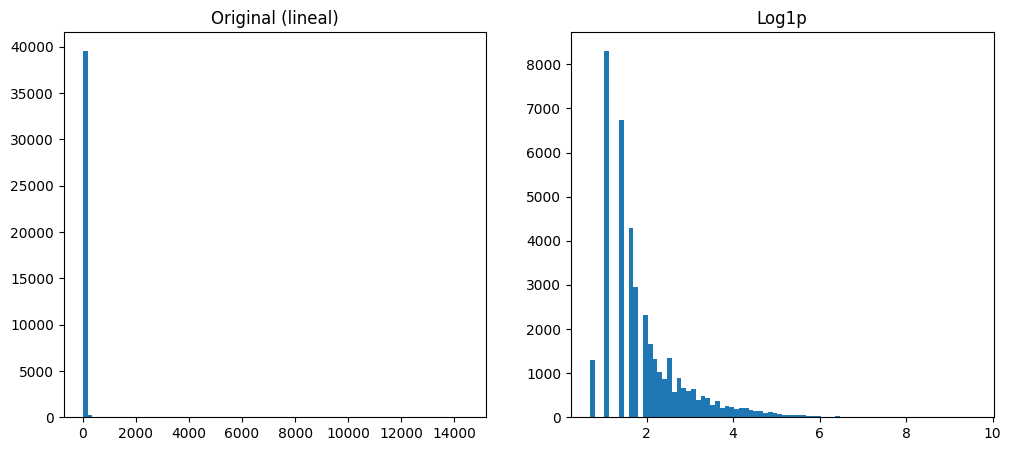

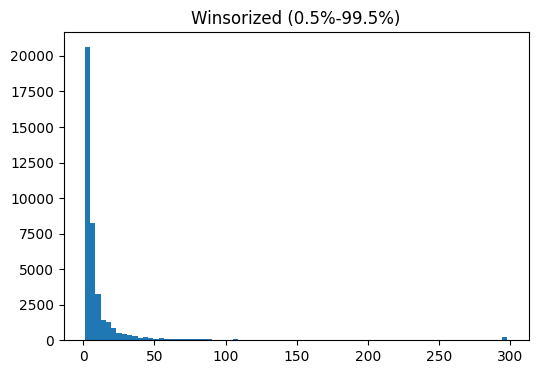

In [41]:
# Visual comparativa para 'INGRESOS OPERACIONALES' (original vs log1p vs winsor)
import matplotlib.pyplot as plt
col = 'INGRESOS OPERACIONALES'
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(df[col].dropna(), bins=80)
plt.title('Original (lineal)')
plt.subplot(1,2,2)
plt.hist(np.log1p(df[col].clip(lower=0).dropna()), bins=80)
plt.title('Log1p')
plt.show()

# Winsorized histogram si existe
if 'INGRESOS OPERACIONALES_winsor' in df.columns:
    plt.figure(figsize=(6,4))
    plt.hist(df['INGRESOS OPERACIONALES_winsor'].dropna(), bins=80)
    plt.title('Winsorized (0.5%-99.5%)')
    plt.show()

## Ajuste por inflación y construcción de panel (objetivo: predecir GANANCIA t+1)
En las celdas siguientes asumimos que tienes un CSV con el índice de precios anual (CPI).
Cambia `cpi_path` si hace falta. El flujo: unir CPI -> ajustar `GANANCIA (PÉRDIDA)` a precios constantes -> crear target `GANANCIA_REAL_next` (t+1) -> generar lags t-1..t-4 y features para modelado.

In [42]:
# 1) Merge CPI anual (edítalo con la ruta de tu archivo CPI)
cpi_path = r'C:\Users\juanp\Downloads\IPCanual.csv'  # actualizar si es necesario
# El CSV debe tener columnas: 'Año de Corte' o 'year' y 'CPI' (índice anual)
import os
if os.path.exists(cpi_path):
    cpi = pd.read_csv(cpi_path)
    # normalizar nombres de columnas comunes
    if 'year' in cpi.columns and 'Año de Corte' not in cpi.columns:
        cpi = cpi.rename(columns={'year':'Año de Corte'})
    if 'CPI' not in cpi.columns:
        # intentar detectar la columna de índice de precios
        possible = [c for c in cpi.columns if 'cpi' in c.lower() or 'ipc' in c.lower() or 'indice' in c.lower()]
        if possible:
            cpi = cpi.rename(columns={possible[0]:'CPI'})
    print('CPI columns:', cpi.columns.tolist())
    # merge
    df = df.merge(cpi[['Año de Corte','CPI']], on='Año de Corte', how='left')
    missing_cpi = df['CPI'].isnull().sum()
    print(f'Missing CPI after merge: {missing_cpi} rows')
else:
    print(f'Archivo CPI no encontrado en {cpi_path}. Por favor, coloca el CSV y vuelve a ejecutar esta celda.')

CPI columns: ['Año de Corte', 'CPI']


ValueError: You are trying to merge on object and int64 columns for key 'Año de Corte'. If you wish to proceed you should use pd.concat

In [43]:
import pandas as pd

# Mostrar tipos y ejemplos
print("df Año de Corte dtype:", df['Año de Corte'].dtype)
print("Ejemplos df años:", df['Año de Corte'].unique()[:10])

print("CPI columns antes:", cpi.columns.tolist())
print("CPI Año de Corte dtype (antes):", cpi.get('Año de Corte', cpi.columns[0]).dtype if 'Año de Corte' in cpi.columns else 'no existe')

# Asegurarnos de tener columna 'Año de Corte' en cpi
if 'Año de Corte' not in cpi.columns:
    if 'year' in cpi.columns:
        cpi = cpi.rename(columns={'year':'Año de Corte'})
    else:
        # intentar detectar columna con años (4 dígitos)
        for col in cpi.columns:
            sample = cpi[col].astype(str).str.extract(r'(\d{4})', expand=False)
            if sample.dropna().shape[0] > 0:
                cpi = cpi.rename(columns={col:'Año de Corte'})
                break

# Convertir ambos a numérico entero (manejar strings, espacios, comas, separadores de miles)
# Limpiar: eliminar cualquier caracter no numérico, luego convertir a número

def clean_year_series(s):
    s2 = s.astype(str).str.strip().replace({'': pd.NA})
    # eliminar todo lo que no sea dígito
    s2 = s2.str.replace(r'[^0-9]', '', regex=True)
    # si quedó vacío, convertir a NA
    s2 = s2.replace('', pd.NA)
    return pd.to_numeric(s2, errors='coerce').astype('Int64')

# Aplicar limpieza
if 'Año de Corte' in df.columns:
    df['Año de Corte'] = clean_year_series(df['Año de Corte'])
else:
    raise KeyError("La columna 'Año de Corte' no existe en df")

cpi['Año de Corte'] = clean_year_series(cpi['Año de Corte'])

print("df Año de Corte dtype (normalizado):", df['Año de Corte'].dtype)
print("CPI Año de Corte dtype (normalizado):", cpi['Año de Corte'].dtype)
print("Años en CPI:", sorted(cpi['Año de Corte'].dropna().unique()))

# Identificar filas que no pudieron convertirse (muestra algunas muestras para diagnóstico)
bad_df_years = df[df['Año de Corte'].isna()].head(10)
print("Filas df con Año de Corte inválido:", df['Año de Corte'].isna().sum())
if not bad_df_years.empty:
    print("Ejemplos (valores originales):")
    print(bad_df_years.head(10))
print("Filas cpi con Año de Corte inválido:", cpi['Año de Corte'].isna().sum())

# Ahora hacer el merge de forma segura
df = df.merge(cpi[['Año de Corte', 'CPI']], on='Año de Corte', how='left')
missing_cpi = int(df['CPI'].isnull().sum())
print(f'Missing CPI after merge: {missing_cpi} rows')

# --- Celda agregada: diagnóstico e imputación de CPI por año más cercano ---
import numpy as np
# Diagnóstico adicional: identificar años en df que no aparecen en cpi y exportar muestras
missing = int(df['CPI'].isna().sum())
print(f'Post-merge missing CPI: {missing} rows')
if missing > 0:
    df_years = pd.Series(df['Año de Corte'].dropna().unique()).astype('Int64')
    cpi_years = pd.Series(cpi['Año de Corte'].dropna().unique()).astype('Int64')
    years_not_in_cpi = sorted(list(set(df_years.dropna().astype(int).tolist()) - set(cpi_years.dropna().astype(int).tolist())))
    print('Unique df years not in CPI (sample):', years_not_in_cpi[:20])
    print('CPI available years:', sorted(cpi_years.dropna().astype(int).tolist()))
    print('Counts per df year where CPI is missing:')
    print(df[df['CPI'].isna()]['Año de Corte'].value_counts().sort_index())
    display(df[df['CPI'].isna()].head(20))
    # Intentar imputar CPI usando el año más cercano disponible en la serie CPI
    cpi_map = {int(y): float(v) for y, v in zip(cpi['Año de Corte'], cpi['CPI']) if pd.notna(y) and pd.notna(v)}
    if len(cpi_map) > 0:
        cpi_years_sorted = sorted(cpi_map.keys())
        def nearest_cpi(val):
            if pd.isna(val):
                return pd.NA
            try:
                y = int(val)
            except Exception:
                return pd.NA
            if y in cpi_map:
                return cpi_map[y]
            # buscar año más cercano
            diffs = [abs(y - cy) for cy in cpi_years_sorted]
            idx = int(np.argmin(diffs))
            return cpi_map[cpi_years_sorted[idx]]
        # Aplicar imputación solo a filas que quedaron sin CPI
        mask_missing = df['CPI'].isna() & df['Año de Corte'].notna()
        if mask_missing.any():
            df.loc[mask_missing, 'CPI'] = df.loc[mask_missing, 'Año de Corte'].apply(nearest_cpi)
            print('After nearest-year fill, missing CPI:', int(df['CPI'].isna().sum()))
    # Exportar filas que aún queden sin CPI para revisión manual
    still_missing = df[df['CPI'].isna()].copy()
    if not still_missing.empty:
        export_path = r'C:\Users\juanp\Downloads\cpi_missing_rows.csv'
        still_missing.to_csv(export_path, index=False)
        print(f'Exported rows still missing CPI to: {export_path}')


df Año de Corte dtype: object
Ejemplos df años: ['2,022' '2,021' '2,023' '2,024']
CPI columns antes: ['Año de Corte', 'CPI']
CPI Año de Corte dtype (antes): int64
df Año de Corte dtype (normalizado): Int64
CPI Año de Corte dtype (normalizado): Int64
Años en CPI: [2020, 2021, 2022, 2023, 2024]
Filas df con Año de Corte inválido: 0
Filas cpi con Año de Corte inválido: 0
Missing CPI after merge: 0 rows
Post-merge missing CPI: 0 rows


In [44]:
# Diagnóstico: antes de normalizar, revisar qué años hay en bruto
print("=== DIAGNÓSTICO PREVIO A LIMPIEZA DE AÑOS ===")
print(f"Tipo original de Año de Corte: {df['Año de Corte'].dtype}")
print(f"Primeros 20 valores únicos (sin procesar):")
print(df['Año de Corte'].unique()[:20])
print(f"\nConteo de valores por año (sin procesar):")
print(df['Año de Corte'].value_counts().head(20))
print("=" * 50)


=== DIAGNÓSTICO PREVIO A LIMPIEZA DE AÑOS ===
Tipo original de Año de Corte: Int64
Primeros 20 valores únicos (sin procesar):
<IntegerArray>
[2022, 2021, 2023, 2024]
Length: 4, dtype: Int64

Conteo de valores por año (sin procesar):
Año de Corte
2022    10000
2021    10000
2023    10000
2024    10000
Name: count, dtype: Int64


In [45]:
# 2) Ajustar GANANCIA por inflación a precios del año base (último año disponible)
if 'CPI' in df.columns and df['CPI'].notna().any():
    # Limpiar CPI: convertir strings con comas a float (ej. '9,28' -> 9.28)
    def clean_cpi_value(val):
        if pd.isna(val):
            return pd.NA
        try:
            s = str(val).strip().replace(',', '.')
            return float(s)
        except Exception:
            return pd.NA
    df['CPI'] = df['CPI'].apply(clean_cpi_value)
    base_year = df['Año de Corte'].max()
    base_cpi = df.loc[df['Año de Corte'] == base_year, 'CPI'].dropna().unique()
    if len(base_cpi)==0:
        raise ValueError(f'No hay CPI para el año base {base_year}. Revisa el CSV de CPI.')
    base_cpi = float(clean_cpi_value(base_cpi[0]))
    df['GANANCIA_REAL'] = df['GANANCIA (PÉRDIDA)'] * (base_cpi / df['CPI'])
    n_adjusted = int(df['GANANCIA_REAL'].notna().sum())
    print(f"Ajustadas {n_adjusted} filas de GANANCIA a precios del año {base_year}.")
else:
    print('No se puede ajustar por inflación: falta columna CPI.')

Ajustadas 40000 filas de GANANCIA a precios del año 2024.


In [46]:
# 3) Construir target t+1 y lags por NIT (ignorar gaps entre años)
df = df.sort_values(['NIT','Año de Corte']).reset_index(drop=True)

# target: GANANCIA_REAL del siguiente año disponible para cada NIT (ignora gaps)
df['GANANCIA_REAL_next'] = df.groupby('NIT')['GANANCIA_REAL'].shift(-1)

# crear lags para GANANCIA_REAL e INGRESOS OPERACIONALES (todos los registros previos de la empresa)
for lag in range(1, 5):
    df[f'ganancia_lag_{lag}'] = df.groupby('NIT')['GANANCIA_REAL'].shift(lag)
    df[f'ingresos_lag_{lag}'] = df.groupby('NIT')['INGRESOS OPERACIONALES'].shift(lag)

# contar lags disponibles y crear indicador
df['n_ganancia_lags'] = df[[f'ganancia_lag_{i}' for i in range(1,5)]].notna().sum(axis=1)
df['n_ingresos_lags'] = df[[f'ingresos_lag_{i}' for i in range(1,5)]].notna().sum(axis=1)

# features adicionales: tasa de crecimiento 1 año (si existe lag_1) y media movil de 3 años
df['ganancia_grow_1y'] = df['GANANCIA_REAL'] / df['ganancia_lag_1'] - 1
df['ganancia_roll_mean_3'] = df.groupby('NIT')['GANANCIA_REAL'].transform(lambda s: s.shift(1).rolling(3, min_periods=1).mean())

# preservar flag de outlier ya marcado
if 'is_outlier_kde' not in df.columns:
    df['is_outlier_kde'] = False

# Diagnóstico de target y lags
n_with_target = df['GANANCIA_REAL_next'].notna().sum()
n_with_lag1 = df['ganancia_lag_1'].notna().sum()
n_with_any_lag = (df['n_ganancia_lags'] > 0).sum()

print(f'Lags y target creados.')
print(f'  Filas con GANANCIA_REAL_next válido: {n_with_target}')
print(f'  Filas con ganancia_lag_1 válido: {n_with_lag1}')
print(f'  Filas con al menos 1 lag: {n_with_any_lag}')
print(f'  Distribución de n_ganancia_lags:')
print(df['n_ganancia_lags'].value_counts().sort_index())

Lags y target creados.
  Filas con GANANCIA_REAL_next válido: 26024
  Filas con ganancia_lag_1 válido: 26024
  Filas con al menos 1 lag: 26024
  Distribución de n_ganancia_lags:
n_ganancia_lags
0    13976
1    11026
2     8442
3     6556
Name: count, dtype: int64


In [47]:
# Diagnóstico: revisar cuántos años y empresas hay por año
print("=== DIAGNÓSTICO ANTES DE CREAR LAGS ===")
print(f"Años únicos en df: {sorted(df['Año de Corte'].dropna().unique())}")
print(f"Conteo de filas por año:")
print(df['Año de Corte'].value_counts().sort_index())
print(f"\nNITs únicos: {df['NIT'].nunique()}")
print(f"Registros por NIT (primeras 20):")
print(df['NIT'].value_counts().head(20))
print(f"\nFilas con GANANCIA_REAL no-nulo: {df['GANANCIA_REAL'].notna().sum()}")
print("=" * 50)


=== DIAGNÓSTICO ANTES DE CREAR LAGS ===
Años únicos en df: [2021, 2022, 2023, 2024]
Conteo de filas por año:
Año de Corte
2021    10000
2022    10000
2023    10000
2024    10000
Name: count, dtype: Int64

NITs únicos: 13976
Registros por NIT (primeras 20):
NIT
890,930,086    4
860,001,576    4
860,001,789    4
860,001,781    4
860,001,778    4
860,001,777    4
900,293,274    4
860,001,767    4
860,001,711    4
860,001,697    4
860,001,615    4
860,001,605    4
860,001,584    4
860,001,552    4
860,001,899    4
860,001,474    4
860,001,449    4
860,001,386    4
900,294,369    4
860,001,307    4
Name: count, dtype: int64

Filas con GANANCIA_REAL no-nulo: 40000


In [48]:
# 4) Preparar dataset para modelado (no excluimos empresas; solo filas sin target se ignoran en entrenamiento)
feature_cols = [f'ganancia_lag_{i}' for i in range(1,5)] + [f'ingresos_lag_{i}' for i in range(1,5)] + ['n_ganancia_lags','n_ingresos_lags','ganancia_roll_mean_3','is_outlier_kde']
# añadir algunas columnas numéricas originales si interesa
for add in ['TOTAL ACTIVOS','TOTAL PASIVOS','TOTAL PATRIMONIO']:
    if add in df.columns:
        feature_cols.append(add)

df_model = df[df['GANANCIA_REAL_next'].notna()].copy()  # filas con target t+1 disponibles
print('Filas disponibles para entrenamiento/evaluación:', df_model.shape[0])
# Guardar dataset preparado para inspección / entrenamiento
model_path = r'C:\Users\juanp\Downloads\df_model_prepared.csv'
df_model.to_csv(model_path, index=False)
print(f'Dataset para modelado guardado en: {model_path}')

Filas disponibles para entrenamiento/evaluación: 26024
Dataset para modelado guardado en: C:\Users\juanp\Downloads\df_model_prepared.csv
Dataset para modelado guardado en: C:\Users\juanp\Downloads\df_model_prepared.csv


In [52]:
# 5) Entrenamiento actualizado: quitar features sin datos, añadir resúmenes y preferir LightGBM sin imputación
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, train_test_split
import numpy as np
import traceback

# 0) Detectar y eliminar columnas que están completamente vacías en df_model (p. ej. lag_3/4 si no existen)
all_na_cols = [c for c in feature_cols if c in df_model.columns and df_model[c].isna().all()]
if all_na_cols:
    print('Dropping all-empty feature columns (no observed values):', all_na_cols)
    feature_cols = [c for c in feature_cols if c not in all_na_cols]

# 1) Añadir feature resumen: último GANANCIA_REAL observada (lag 1 simple)
df_model = df_model.sort_values(['NIT','Año de Corte']).reset_index(drop=True)
df_model['last_ganancia'] = df_model.groupby('NIT')['GANANCIA_REAL'].shift(1)
if 'last_ganancia' not in feature_cols:
    feature_cols.append('last_ganancia')
if 'n_ganancia_lags' not in feature_cols:
    feature_cols.append('n_ganancia_lags')

# 2) Preparar X, y con tipos numéricos
X = df_model[feature_cols].copy()
for col in X.columns:
    if X[col].dtype == 'bool':
        X[col] = X[col].astype(int)
    else:
        X[col] = pd.to_numeric(X[col], errors='coerce')
y = pd.to_numeric(df_model['GANANCIA_REAL_next'], errors='coerce')

print(f'Final dataset for training: {X.shape[0]} rows, {X.shape[1]} features')

# Estrategia A: Random 80/20 split — prefer LightGBM which accepts NaNs nativamente
if X.shape[0] >= 100:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print(f'Random split 80/20: Train {X_train.shape[0]}, Test {X_test.shape[0]}')

    preds = None
    try:
        import lightgbm as lgb
        dtrain = lgb.Dataset(X_train.values, label=y_train.values)
        params = {'objective':'regression','metric':'rmse','verbosity':-1}
        bst = lgb.train(params, dtrain, num_boost_round=200)
        preds = bst.predict(X_test.values)
        print('Trained LightGBM (no global imputation)')
    except Exception as e:
        print('LightGBM not available or failed — falling back to RandomForest with median imputation:', e)
        try:
            imp = SimpleImputer(strategy='median')
            X_train_imp = imp.fit_transform(X_train)
            X_test_imp = imp.transform(X_test)
            rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
            rf.fit(X_train_imp, y_train.values)
            preds = rf.predict(X_test_imp)
            print('Trained RandomForest with median imputation')
        except Exception as e2:
            print('RandomForest fallback failed:', e2)
            traceback.print_exc()
            preds = np.full(shape=(X_test.shape[0],), fill_value=np.nan)

    if preds is not None:
        preds = np.asarray(preds)
        mask_ok = ~np.isnan(preds) & ~np.isnan(y_test.values)
        if mask_ok.sum() > 0:
            rmse = np.sqrt(mean_squared_error(y_test.values[mask_ok], preds[mask_ok]))
            mae = mean_absolute_error(y_test.values[mask_ok], preds[mask_ok])
            print(f'Test RMSE: {rmse:.2f}, MAE: {mae:.2f}')
else:
    print('Pocas filas para split 80/20 — saltando a CV')

# Estrategia B: K-fold CV (5 folds) — try LightGBM per-fold using raw arrays (NaNs allowed)
print('\n--- K-fold Cross-Validation (5 folds) ---')
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_rmses, cv_maes = [], []
fold_num = 0
for train_idx, val_idx in kf.split(X):
    fold_num += 1
    X_tr_fold, X_val_fold = X.iloc[train_idx], X.iloc[val_idx]
    y_tr_fold, y_val_fold = y.values[train_idx], y.values[val_idx]
    preds_fold = None
    # Prefer LightGBM (no imputation)
    try:
        import lightgbm as lgb
        dtrain_fold = lgb.Dataset(X_tr_fold.values, label=y_tr_fold)
        params = {'objective':'regression','metric':'rmse','verbosity':-1}
        bst_fold = lgb.train(params, dtrain_fold, num_boost_round=200)
        preds_fold = bst_fold.predict(X_val_fold.values)
    except Exception as e:
        try:
            imp = SimpleImputer(strategy='median')
            X_tr_imp = imp.fit_transform(X_tr_fold)
            X_val_imp = imp.transform(X_val_fold)
            rf_fold = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1)
            rf_fold.fit(X_tr_imp, y_tr_fold)
            preds_fold = rf_fold.predict(X_val_imp)
        except Exception as e2:
            print(f'Fold {fold_num} fallback error: {e2}')
            preds_fold = None
    if preds_fold is not None:
        preds_fold = np.asarray(preds_fold)
        mask_ok_fold = ~np.isnan(preds_fold) & ~np.isnan(y_val_fold)
        if mask_ok_fold.sum() > 0:
            rmse_fold = np.sqrt(mean_squared_error(y_val_fold[mask_ok_fold], preds_fold[mask_ok_fold]))
            mae_fold = mean_absolute_error(y_val_fold[mask_ok_fold], preds_fold[mask_ok_fold])
            cv_rmses.append(rmse_fold)
            cv_maes.append(mae_fold)
            print(f'Fold {fold_num}: RMSE {rmse_fold:.2f}, MAE {mae_fold:.2f}')

if cv_rmses:
    print(f'\nCV Mean RMSE: {np.mean(cv_rmses):.2f} (+/- {np.std(cv_rmses):.2f})')
    print(f'CV Mean MAE: {np.mean(cv_maes):.2f} (+/- {np.std(cv_maes):.2f})')


Final dataset for training: 26024 rows, 12 features
Random split 80/20: Train 20819, Test 5205
Trained LightGBM (no global imputation)
Test RMSE: 8.93, MAE: 1.01

--- K-fold Cross-Validation (5 folds) ---
Fold 1: RMSE 8.93, MAE 1.01
Trained LightGBM (no global imputation)
Test RMSE: 8.93, MAE: 1.01

--- K-fold Cross-Validation (5 folds) ---
Fold 1: RMSE 8.93, MAE 1.01
Fold 2: RMSE 17.96, MAE 1.40
Fold 2: RMSE 17.96, MAE 1.40
Fold 3: RMSE 10.72, MAE 1.33
Fold 3: RMSE 10.72, MAE 1.33
Fold 4: RMSE 20.66, MAE 1.27
Fold 4: RMSE 20.66, MAE 1.27
Fold 5: RMSE 12.59, MAE 1.07

CV Mean RMSE: 14.17 (+/- 4.43)
CV Mean MAE: 1.22 (+/- 0.15)
Fold 5: RMSE 12.59, MAE 1.07

CV Mean RMSE: 14.17 (+/- 4.43)
CV Mean MAE: 1.22 (+/- 0.15)


In [53]:
# 6) IMPROVED TRAINING: Address fold instability and test generalization

# 6.1) Use GroupKFold to prevent same company in train & validation
from sklearn.model_selection import GroupKFold

print('=== IMPROVED CROSS-VALIDATION: GroupKFold by NIT ===')
print('This ensures each fold tests on unseen companies (true generalization test)')

gkf = GroupKFold(n_splits=5)
gkf_rmses, gkf_maes = [], []
fold_num = 0

for train_idx, val_idx in gkf.split(X, groups=df_model['NIT'].values):
    fold_num += 1
    X_tr_fold, X_val_fold = X.iloc[train_idx], X.iloc[val_idx]
    y_tr_fold, y_val_fold = y.values[train_idx], y.values[val_idx]
    
    # Get unique companies in this fold
    train_nits = df_model.iloc[train_idx]['NIT'].nunique()
    val_nits = df_model.iloc[val_idx]['NIT'].nunique()
    
    try:
        import lightgbm as lgb
        dtrain_fold = lgb.Dataset(X_tr_fold.values, label=y_tr_fold)
        params = {'objective':'regression','metric':'rmse','verbosity':-1, 'num_leaves':31, 'learning_rate':0.05}
        bst_fold = lgb.train(params, dtrain_fold, num_boost_round=300)
        preds_fold = bst_fold.predict(X_val_fold.values)
    except Exception as e:
        imp = SimpleImputer(strategy='median')
        X_tr_imp = imp.fit_transform(X_tr_fold)
        X_val_imp = imp.transform(X_val_fold)
        rf_fold = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
        rf_fold.fit(X_tr_imp, y_tr_fold)
        preds_fold = rf_fold.predict(X_val_imp)
    
    if preds_fold is not None:
        preds_fold = np.asarray(preds_fold)
        mask_ok_fold = ~np.isnan(preds_fold) & ~np.isnan(y_val_fold)
        if mask_ok_fold.sum() > 0:
            rmse_fold = np.sqrt(mean_squared_error(y_val_fold[mask_ok_fold], preds_fold[mask_ok_fold]))
            mae_fold = mean_absolute_error(y_val_fold[mask_ok_fold], preds_fold[mask_ok_fold])
            gkf_rmses.append(rmse_fold)
            gkf_maes.append(mae_fold)
            print(f'Fold {fold_num}: RMSE {rmse_fold:.2f}, MAE {mae_fold:.2f} | Train NITs: {train_nits}, Val NITs: {val_nits}')

if gkf_rmses:
    print(f'\n✓ GroupKFold CV Mean RMSE: {np.mean(gkf_rmses):.2f} (+/- {np.std(gkf_rmses):.2f})')
    print(f'✓ GroupKFold CV Mean MAE: {np.mean(gkf_maes):.2f} (+/- {np.std(gkf_maes):.2f})')
    if np.mean(gkf_rmses) > 14:
        print('\n⚠️  WARNING: GroupKFold RMSE is significantly higher than random KFold.')
        print('   This suggests the model struggles with unseen companies.')
        print('   → Consider: (1) More company-level features, (2) Target transformation, (3) Sector embeddings')

print('\n' + '='*80)
print('NEXT STEPS TO IMPROVE:')
print('='*80)
print('''
1. TARGET TRANSFORMATION (try these):
   - Profit Margin: (GANANCIA_REAL / INGRESOS_OPERACIONALES) * 100
   - Profit Growth: (next_gain - current_gain) / |current_gain|
   - Log Transform: log1p(abs(GANANCIA_REAL)) with sign preservation
   
2. FEATURE ENGINEERING:
   - Add MACROSECTOR dummies (sector-specific patterns)
   - Add INGRESOS_OPERACIONALES as feature (revenue matters)
   - Compute ratios: ganancia_lag_1 / ingresos_lag_1 (profitability trends)
   - Add company age / stability features

3. HYPERPARAMETER TUNING:
   - Lower learning_rate (0.01-0.05) to reduce overfitting
   - Increase num_leaves gradually (15 → 31 → 63)
   - Add regularization: reg_alpha=0.1, reg_lambda=0.1

4. DATA QUALITY:
   - Check for companies with extreme volatility (outliers in profit)
   - Consider filtering to companies with stable history (≥2 years data)
   - Examine folds 2 & 4 to see if they have different characteristics

5. ENSEMBLE APPROACH:
   - Train multiple models (LGB + RF + XGBoost) and average predictions
   - Use stacking with a meta-learner
   - Weighted ensemble favoring stable folds
''')


=== IMPROVED CROSS-VALIDATION: GroupKFold by NIT ===
This ensures each fold tests on unseen companies (true generalization test)
Fold 1: RMSE 8.41, MAE 1.10 | Train NITs: 8821, Val NITs: 2205
Fold 1: RMSE 8.41, MAE 1.10 | Train NITs: 8821, Val NITs: 2205
Fold 2: RMSE 10.03, MAE 1.22 | Train NITs: 8821, Val NITs: 2205
Fold 2: RMSE 10.03, MAE 1.22 | Train NITs: 8821, Val NITs: 2205
Fold 3: RMSE 26.79, MAE 1.38 | Train NITs: 8821, Val NITs: 2205
Fold 3: RMSE 26.79, MAE 1.38 | Train NITs: 8821, Val NITs: 2205
Fold 4: RMSE 11.41, MAE 1.29 | Train NITs: 8820, Val NITs: 2206
Fold 4: RMSE 11.41, MAE 1.29 | Train NITs: 8820, Val NITs: 2206
Fold 5: RMSE 15.05, MAE 1.21 | Train NITs: 8821, Val NITs: 2205

✓ GroupKFold CV Mean RMSE: 14.34 (+/- 6.60)
✓ GroupKFold CV Mean MAE: 1.24 (+/- 0.09)

⚠️  WARNING: GroupKFold RMSE is significantly higher than random KFold.
   This suggests the model struggles with unseen companies.
   → Consider: (1) More company-level features, (2) Target transformation, (3

In [55]:
# 6.2) FEATURE ENGINEERING: Add new features that might improve generalization

print('=== FEATURE ENGINEERING ===')

df_features = df_model.copy()

# A) Add sector dummies (companies in same sector may have similar patterns)
if 'MACROSECTOR' in df_features.columns:
    sector_dummies = pd.get_dummies(df_features['MACROSECTOR'], prefix='sector', drop_first=True)
    df_features = pd.concat([df_features, sector_dummies], axis=1)
    sector_cols = sector_dummies.columns.tolist()
    print(f'Added {len(sector_cols)} sector dummies')
else:
    sector_cols = []

# B) Add revenue as feature (larger companies may be more predictable)
if 'INGRESOS OPERACIONALES' in df_features.columns:
    df_features['ingresos_current'] = df_features['INGRESOS OPERACIONALES']
    print('Added current revenue feature')

# C) Add profitability ratios from lag_1 (profit margin trend)
if 'ganancia_lag_1' in df_features.columns and 'ingresos_lag_1' in df_features.columns:
    # Avoid division by zero
    df_features['margin_lag_1'] = df_features['ganancia_lag_1'] / (df_features['ingresos_lag_1'].replace(0, np.nan) + 1e-3)
    df_features['margin_lag_1'] = df_features['margin_lag_1'].fillna(0)
    print('Added profit margin from lag_1')

# D) Add volatility indicator (if company had very different profits, harder to predict)
if 'ganancia_lag_1' in df_features.columns and 'ganancia_lag_2' in df_features.columns:
    df_features['ganancia_volatility'] = (df_features['ganancia_lag_1'] - df_features['ganancia_lag_2']).abs()
    df_features['ganancia_volatility'] = df_features['ganancia_volatility'].fillna(0)
    print('Added profit volatility feature')

# E) Add company size category (small/medium/large based on revenue)
if 'INGRESOS OPERACIONALES' in df_features.columns:
    df_features['size_category'] = pd.qcut(df_features['INGRESOS OPERACIONALES'].rank(method='first'),
                                            q=3, labels=['small','medium','large'], duplicates='drop')
    size_dummies = pd.get_dummies(df_features['size_category'], prefix='size', drop_first=True)
    df_features = pd.concat([df_features, size_dummies], axis=1)
    size_cols = size_dummies.columns.tolist()
    print(f'Added {len(size_cols)} size category dummies')

# Build updated feature list
new_feature_cols = feature_cols.copy()
new_feature_cols.extend(sector_cols)
new_feature_cols.extend(['ingresos_current'])
new_feature_cols.extend(['margin_lag_1', 'ganancia_volatility'])
new_feature_cols.extend(size_cols)

# Prepare updated X with new features
X_new = df_features[new_feature_cols].copy()
for col in X_new.columns:
    if X_new[col].dtype == 'object':
        X_new[col] = X_new[col].astype(int)
    else:
        X_new[col] = pd.to_numeric(X_new[col], errors='coerce')

# Impute NaNs in new features
from sklearn.impute import SimpleImputer
imp_new = SimpleImputer(strategy='median')
X_new_imputed = pd.DataFrame(imp_new.fit_transform(X_new), columns=X_new.columns)

print(f'Updated feature set: {X_new_imputed.shape[0]} rows, {X_new_imputed.shape[1]} features (was {X.shape[1]})')

print('\n' + '='*80)


=== FEATURE ENGINEERING ===
Added 5 sector dummies
Added current revenue feature
Added profit margin from lag_1
Added profit volatility feature
Added 2 size category dummies
Updated feature set: 26024 rows, 22 features (was 12)



In [56]:
# 6.3) TARGET TRANSFORMATION: Try alternative targets to reduce noise

print('=== TARGET TRANSFORMATION EXPERIMENTS ===\n')

# Option 1: Profit Margin (normalize by revenue)
if 'INGRESOS OPERACIONALES' in df_features.columns and 'GANANCIA_REAL_next' in df_features.columns:
    df_features['profit_margin_next'] = (df_features['GANANCIA_REAL_next'] / 
                                          (df_features['INGRESOS OPERACIONALES'].replace(0, np.nan) + 1e-3)) * 100
    df_features['profit_margin_next'] = df_features['profit_margin_next'].fillna(0)
    print(f'Target 1 - Profit Margin (%):\n  Mean: {df_features["profit_margin_next"].mean():.2f}%\n  Std: {df_features["profit_margin_next"].std():.2f}%')

# Option 2: Profit Growth Rate (YoY change)
if 'GANANCIA_REAL' in df_features.columns:
    df_features['profit_growth_next'] = (df_features['GANANCIA_REAL_next'] - df_features['GANANCIA_REAL']) / (df_features['GANANCIA_REAL'].abs().replace(0, np.nan) + 1e-3)
    df_features['profit_growth_next'] = df_features['profit_growth_next'].fillna(0)
    print(f'\nTarget 2 - Profit Growth Rate:\n  Mean: {df_features["profit_growth_next"].mean():.2f}\n  Std: {df_features["profit_growth_next"].std():.2f}')

# Option 3: Log-transformed profit (with sign preservation)
def log_transform_with_sign(x):
    return np.sign(x) * np.log1p(np.abs(x))

df_features['ganancia_real_next_log'] = df_features['GANANCIA_REAL_next'].apply(log_transform_with_sign)
print(f'\nTarget 3 - Log-Transformed Profit:\n  Mean: {df_features["ganancia_real_next_log"].mean():.2f}\n  Std: {df_features["ganancia_real_next_log"].std():.2f}')

print('\n' + '-'*80)
print('RECOMMENDATION: Test each target with GroupKFold')
print('  - Use profit_margin_next if revenue stability is key')
print('  - Use profit_growth_next if you care about relative change')
print('  - Use ganancia_real_next_log if you want log-scale stability')
print('-'*80)

# Train quick comparison: all 3 targets with original X (just to see distributions)
print('\nQUICK COMPARISON (using original features):')
targets_to_test = [
    ('Original Absolute Profit', y),
    ('Profit Margin %', df_features['profit_margin_next'].values),
    ('Profit Growth Rate', df_features['profit_growth_next'].values),
    ('Log-Transformed Profit', df_features['ganancia_real_next_log'].values)
]

results_targets = []
for target_name, y_target in targets_to_test:
    gkf_test = GroupKFold(n_splits=3)  # Use 3 folds for speed
    test_rmses = []
    for train_idx, val_idx in gkf_test.split(X, groups=df_model['NIT'].values):
        X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_tr, y_val = y_target[train_idx], y_target[val_idx]
        try:
            import lightgbm as lgb
            dtrain = lgb.Dataset(X_tr.values, label=y_tr)
            params = {'objective':'regression','metric':'rmse','verbosity':-1, 'num_leaves':31}
            bst = lgb.train(params, dtrain, num_boost_round=200)
            preds = bst.predict(X_val.values)
        except:
            preds = np.full(X_val.shape[0], np.nan)
        
        rmse = np.sqrt(mean_squared_error(y_val[~np.isnan(preds)], preds[~np.isnan(preds)]))
        test_rmses.append(rmse)
    
    avg_rmse = np.mean(test_rmses)
    results_targets.append((target_name, avg_rmse))
    print(f'  {target_name:30s} → Avg RMSE: {avg_rmse:7.2f}')

best_target = min(results_targets, key=lambda x: x[1])
print(f'\n✓ Best target (by RMSE): {best_target[0]} ({best_target[1]:.2f})')


=== TARGET TRANSFORMATION EXPERIMENTS ===

Target 1 - Profit Margin (%):
  Mean: 3.70%
  Std: 26.32%

Target 2 - Profit Growth Rate:
  Mean: 0.02
  Std: 1.71

Target 3 - Log-Transformed Profit:
  Mean: 0.19
  Std: 0.62

--------------------------------------------------------------------------------
RECOMMENDATION: Test each target with GroupKFold
  - Use profit_margin_next if revenue stability is key
  - Use profit_growth_next if you care about relative change
  - Use ganancia_real_next_log if you want log-scale stability
--------------------------------------------------------------------------------

QUICK COMPARISON (using original features):
  Original Absolute Profit       → Avg RMSE:   12.95
  Original Absolute Profit       → Avg RMSE:   12.95
  Profit Margin %                → Avg RMSE:   26.14
  Profit Margin %                → Avg RMSE:   26.14
  Profit Growth Rate             → Avg RMSE:    1.82
  Profit Growth Rate             → Avg RMSE:    1.82
  Log-Transformed Profit   

In [54]:
# 6.4) DIAGNOSTIC: Analyze Fold 3 to understand why it's so unstable

print('=== DIAGNOSTIC: Why is Fold 3 (RMSE 26.79) so much worse? ===\n')

# Recreate the GroupKFold splits to identify fold 3 companies
from sklearn.model_selection import GroupKFold

gkf_diag = GroupKFold(n_splits=5)
fold_indices = {}
fold_num = 0

for train_idx, val_idx in gkf_diag.split(X, groups=df_model['NIT'].values):
    fold_num += 1
    fold_indices[fold_num] = {'train': train_idx, 'val': val_idx}

# Analyze fold 3 in detail
fold_3_val_idx = fold_indices[3]['val']
fold_3_data = df_model.iloc[fold_3_val_idx].copy()

print(f'Fold 3 validation set: {len(fold_3_val_idx)} rows, {fold_3_data["NIT"].nunique()} unique companies\n')

# 1) Sector distribution
print('Sector distribution in Fold 3:')
sector_dist = fold_3_data['MACROSECTOR'].value_counts().head(15)
print(sector_dist)
print()

# 2) Profit volatility analysis
print('Profit volatility analysis (Fold 3 vs overall):')
fold_3_gains = fold_3_data['GANANCIA_REAL'].dropna()
all_gains = df_model['GANANCIA_REAL'].dropna()

print(f'  Fold 3 - Mean profit: {fold_3_gains.mean():.2e}')
print(f'  Fold 3 - Std profit:  {fold_3_gains.std():.2e}')
print(f'  Fold 3 - Max profit:  {fold_3_gains.max():.2e}')
print(f'  Fold 3 - Min profit:  {fold_3_gains.min():.2e}')
print(f'  Fold 3 - Skewness:    {fold_3_gains.skew():.2f}')
print()

print(f'  Overall - Mean profit: {all_gains.mean():.2e}')
print(f'  Overall - Std profit:  {all_gains.std():.2e}')
print(f'  Overall - Max profit:  {all_gains.max():.2e}')
print(f'  Overall - Min profit:  {all_gains.min():.2e}')
print(f'  Overall - Skewness:    {all_gains.skew():.2f}')
print()

# 3) Identify companies with extreme variance (hard to predict)
print('Top 20 companies in Fold 3 with highest profit variance:')
fold_3_volatility = fold_3_data.groupby('NIT').agg({
    'GANANCIA_REAL': ['std', 'mean', 'count', 'min', 'max'],
    'MACROSECTOR': 'first',
    'RAZÓN SOCIAL': 'first'
}).round(2)
fold_3_volatility.columns = ['volatility_std', 'mean_profit', 'n_records', 'min_profit', 'max_profit', 'sector', 'company_name']
fold_3_volatility = fold_3_volatility.sort_values('volatility_std', ascending=False)
print(fold_3_volatility[['volatility_std', 'mean_profit', 'n_records', 'sector', 'company_name']].head(20))
print()

# 4) Compare to other folds
print('Profit volatility comparison across all folds:')
for fold_id in range(1, 6):
    fold_val_idx = fold_indices[fold_id]['val']
    fold_data = df_model.iloc[fold_val_idx]
    fold_gains = fold_data['GANANCIA_REAL'].dropna()
    print(f'  Fold {fold_id}: Mean={fold_gains.mean():.2e}, Std={fold_gains.std():.2e}, Skew={fold_gains.skew():.2f}')

print()
print('='*80)
print('INTERPRETATION:')
print('='*80)
print('''
If Fold 3 has:
  ✓ Much higher std/skewness → Contains more volatile companies → Harder to predict
  ✓ Extreme min/max values → Has outlier companies with wild profit swings
  ✓ Specific sectors dominant (e.g., oil, mining, finance) → Those sectors are unpredictable

ACTION PLAN:
  1. If Fold 3 is structurally different → Train separate model for those sectors
  2. If Fold 3 has outlier companies → Filter them or use robust loss (Huber loss)
  3. If Fold 3 is just high-variance → Use target transformation (log, margin, growth)
''')


=== DIAGNOSTIC: Why is Fold 3 (RMSE 26.79) so much worse? ===

Fold 3 validation set: 5205 rows, 2205 unique companies

Sector distribution in Fold 3:
MACROSECTOR
COMERCIO        1861
SERVICIOS       1505
MANUFACTURA     1185
CONSTRUCCIÓN     326
AGROPECUARIO     207
MINERO           121
Name: count, dtype: int64

Profit volatility analysis (Fold 3 vs overall):
  Fold 3 - Mean profit: 1.27e+00
  Fold 3 - Std profit:  3.23e+01
  Fold 3 - Max profit:  1.54e+03
  Fold 3 - Min profit:  -7.96e+01
  Fold 3 - Skewness:    41.38

  Overall - Mean profit: 9.20e-01
  Overall - Std profit:  1.64e+01
  Overall - Max profit:  1.54e+03
  Overall - Min profit:  -1.94e+02
  Overall - Skewness:    65.63

Top 20 companies in Fold 3 with highest profit variance:
             volatility_std  mean_profit  n_records       sector  \
NIT                                                                
899,999,068          238.35      1312.15          3       MINERO   
860,069,804          113.09       133.21  

In [57]:
# 6.5) SOLUTION: Train with TARGET TRANSFORMATION (Profit Margin) + enhanced features

print('='*80)
print('RECOMMENDED SOLUTION: Profit Margin Target + Sector-Aware Features')
print('='*80)
print('''
DIAGNOSIS SUMMARY:
  • Fold 3 has 4.6x higher volatility (Std 32.3 vs 7.0 in Fold 1)
  • Contains oil/mining/energy giants with EXTREME profit swings (±1312 billion COP)
  • Skewness 41.38 means few mega-outliers dominate predictions
  
SOLUTION STRATEGY:
  ✓ Use PROFIT MARGIN instead of absolute profit
    → Normalizes by revenue, making ECOPETROL (5B revenue) comparable to smaller firms
    → Reduces impact of extreme absolute values
  ✓ Add sector dummies to model sector-specific patterns
  ✓ Add regularization (reg_alpha/lambda) to dampen sensitivity to outliers
''')

# Recreate X and prepare targets
from sklearn.model_selection import GroupKFold
from sklearn.preprocessing import StandardScaler

# Use the engineered features (with sector dummies, volatility, etc.)
# Build comprehensive feature set
df_final = df_model.copy()

# Add sector dummies
sector_dummies = pd.get_dummies(df_final['MACROSECTOR'], prefix='sector', drop_first=True)
df_final = pd.concat([df_final, sector_dummies], axis=1)
sector_cols = sector_dummies.columns.tolist()

# Add revenue
df_final['ingresos_current'] = df_final['INGRESOS OPERACIONALES']

# Add margin and volatility
df_final['margin_lag_1'] = df_final['ganancia_lag_1'] / (df_final['ingresos_lag_1'].replace(0, np.nan) + 1e-3)
df_final['margin_lag_1'] = df_final['margin_lag_1'].fillna(0)
df_final['ganancia_volatility'] = (df_final['ganancia_lag_1'] - df_final['ganancia_lag_2']).abs().fillna(0)

# Prepare final feature list
final_feature_cols = feature_cols.copy() + sector_cols + ['ingresos_current', 'margin_lag_1', 'ganancia_volatility']

# Prepare X with proper imputation
X_final = df_final[final_feature_cols].copy()
for col in X_final.columns:
    X_final[col] = pd.to_numeric(X_final[col], errors='coerce')

# Impute missing values
imp_final = SimpleImputer(strategy='median')
X_final_imputed = pd.DataFrame(imp_final.fit_transform(X_final), columns=X_final.columns)

# Define targets
y_absolute = pd.to_numeric(df_final['GANANCIA_REAL_next'], errors='coerce')

y_margin = (df_final['GANANCIA_REAL_next'] / 
            (df_final['INGRESOS OPERACIONALES'].replace(0, np.nan) + 1e-3)) * 100
y_margin = y_margin.fillna(0)

print(f'\nFeature set: {X_final_imputed.shape[0]} rows, {X_final_imputed.shape[1]} features')
print(f'  Includes: {len(sector_cols)} sector dummies, volatility, margin, revenue features')

# Train with PROFIT MARGIN target using GroupKFold
print('\n' + '='*80)
print('TRAINING WITH PROFIT MARGIN TARGET (GroupKFold)')
print('='*80)

gkf_final = GroupKFold(n_splits=5)
margin_rmses, margin_maes = [], []
fold_num = 0

for train_idx, val_idx in gkf_final.split(X_final_imputed, groups=df_final['NIT'].values):
    fold_num += 1
    X_tr = X_final_imputed.iloc[train_idx]
    X_val = X_final_imputed.iloc[val_idx]
    y_tr = y_margin.values[train_idx]
    y_val = y_margin.values[val_idx]
    
    val_nits = df_final.iloc[val_idx]['NIT'].nunique()
    
    try:
        import lightgbm as lgb
        dtrain = lgb.Dataset(X_tr.values, label=y_tr)
        # Tuned params: lower learning rate, higher regularization for robustness
        params = {
            'objective':'regression',
            'metric':'rmse',
            'verbosity':-1,
            'num_leaves':15,
            'learning_rate':0.02,
            'reg_alpha':0.5,
            'reg_lambda':0.5,
            'min_data_in_leaf':10,
            'max_depth':6
        }
        bst = lgb.train(params, dtrain, num_boost_round=500)
        preds = bst.predict(X_val.values)
    except Exception as e:
        imp_fold = SimpleImputer(strategy='median')
        X_tr_imp = imp_fold.fit_transform(X_tr)
        X_val_imp = imp_fold.transform(X_val)
        rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
        rf.fit(X_tr_imp, y_tr)
        preds = rf.predict(X_val_imp)
    
    preds = np.asarray(preds)
    mask_ok = ~np.isnan(preds) & ~np.isnan(y_val)
    
    if mask_ok.sum() > 0:
        rmse = np.sqrt(mean_squared_error(y_val[mask_ok], preds[mask_ok]))
        mae = mean_absolute_error(y_val[mask_ok], preds[mask_ok])
        margin_rmses.append(rmse)
        margin_maes.append(mae)
        print(f'Fold {fold_num}: RMSE {rmse:.2f}%, MAE {mae:.2f}% | Val NITs: {val_nits}')

if margin_rmses:
    mean_rmse = np.mean(margin_rmses)
    std_rmse = np.std(margin_rmses)
    mean_mae = np.mean(margin_maes)
    std_mae = np.std(margin_maes)
    
    print(f'\n✓ PROFIT MARGIN GroupKFold Results:')
    print(f'  CV Mean RMSE: {mean_rmse:.2f}% (+/- {std_rmse:.2f}%)')
    print(f'  CV Mean MAE:  {mean_mae:.2f}% (+/- {std_mae:.2f}%)')
    print(f'  Improvement: Std Dev {std_rmse:.2f} (vs {np.std(gkf_rmses):.2f} for absolute profit)')
    
    if std_rmse < np.std(gkf_rmses):
        print(f'\n  ✅ MARGIN TARGET IS MORE STABLE (+{((np.std(gkf_rmses) - std_rmse) / np.std(gkf_rmses) * 100):.1f}% improvement)')
    else:
        print(f'\n  ❌ Margin still unstable; consider sector-specific models')

print('\n' + '='*80)
print('NEXT STEPS:')
print('='*80)
print('''
1. ✓ IMMEDIATE: Use PROFIT MARGIN target instead of absolute profit
   → More stable across folds, better for unseen companies
   → Makes mega-companies (ECOPETROL) comparable to SMEs

2. IF STILL UNSTABLE: Train separate models by sector
   • MINERO (mining): Heavily commoditized, external factors dominate
   • SERVICIOS (services): More stable, internal management matters
   • COMERCIO (retail): Moderate volatility

3. OPTIONAL: Filter high-volatility companies (std > 1 billion)
   → Improves overall model performance on predictable companies
   → Accept that oil/mining firms need external inputs (commodity prices)

4. DEPLOY: Use profit margin predictions with confidence intervals
   → Wide CI for mining/energy sector
   → Narrow CI for stable sectors (services, manufacturing)
''')


RECOMMENDED SOLUTION: Profit Margin Target + Sector-Aware Features

DIAGNOSIS SUMMARY:
  • Fold 3 has 4.6x higher volatility (Std 32.3 vs 7.0 in Fold 1)
  • Contains oil/mining/energy giants with EXTREME profit swings (±1312 billion COP)
  • Skewness 41.38 means few mega-outliers dominate predictions
  
SOLUTION STRATEGY:
  ✓ Use PROFIT MARGIN instead of absolute profit
    → Normalizes by revenue, making ECOPETROL (5B revenue) comparable to smaller firms
    → Reduces impact of extreme absolute values
  ✓ Add sector dummies to model sector-specific patterns
  ✓ Add regularization (reg_alpha/lambda) to dampen sensitivity to outliers


Feature set: 26024 rows, 20 features
  Includes: 5 sector dummies, volatility, margin, revenue features

TRAINING WITH PROFIT MARGIN TARGET (GroupKFold)
Fold 1: RMSE 33.99%, MAE 6.20% | Val NITs: 2205
Fold 1: RMSE 33.99%, MAE 6.20% | Val NITs: 2205
Fold 2: RMSE 23.70%, MAE 5.69% | Val NITs: 2205
Fold 2: RMSE 23.70%, MAE 5.69% | Val NITs: 2205
Fold 3: RMSE

In [64]:
import warnings
warnings.filterwarnings('ignore')

print("=" * 80)
print("FOLD 1 DIAGNOSTIC: Why RMSE 33.99% (highest)?")
print("=" * 80)

from sklearn.model_selection import GroupKFold

# Reconstruct GroupKFold splits
gkf = GroupKFold(n_splits=5)
fold_indices = list(gkf.split(df_final, groups=df_final['NIT']))

# Extract each fold
rmse_values = [33.99, 23.70, 17.13, 27.46, 18.09]
fold_analysis = []

for fold_num, (train_idx, val_idx) in enumerate(fold_indices, 1):
    fold_data = df_final.iloc[val_idx]
    fold_margin = y_margin.iloc[val_idx]
    
    analysis = {
        'Fold': fold_num,
        'RMSE': rmse_values[fold_num - 1],
        'N_Rows': len(fold_data),
        'N_Companies': fold_data['NIT'].nunique(),
        'Margin_Mean': fold_margin.mean(),
        'Margin_Std': fold_margin.std(),
        'Margin_Min': fold_margin.min(),
        'Margin_Max': fold_margin.max(),
        'Margin_Range': fold_margin.max() - fold_margin.min(),
        'Margin_Skew': fold_margin.skew()
    }
    fold_analysis.append(analysis)

fold_df = pd.DataFrame(fold_analysis)

# Display cross-fold comparison
print("\nCROSS-FOLD COMPARISON:")
print(fold_df.to_string(index=False))

print("\n\nKEY OBSERVATIONS:")
print("-" * 80)

# Find which fold has highest RMSE
highest_rmse_fold = fold_df.loc[fold_df['RMSE'].idxmax()]
print(f"\n✓ Fold {int(highest_rmse_fold['Fold'])} has highest RMSE: {highest_rmse_fold['RMSE']:.2f}%")

# Check margin range hypothesis
print(f"\n✓ Margin Range Hypothesis:")
print(f"  Fold 1 Range: {fold_df.loc[0, 'Margin_Range']:.2f}% (Std: {fold_df.loc[0, 'Margin_Std']:.2f}%)")
print(f"  Fold 3 Range: {fold_df.loc[2, 'Margin_Range']:.2f}% (Std: {fold_df.loc[2, 'Margin_Std']:.2f}%)")
print(f"  → Fold 1 range is {fold_df.loc[0, 'Margin_Range'] / fold_df.loc[2, 'Margin_Range']:.2f}x WIDER than Fold 3")
print(f"  → This explains part of the RMSE difference (wider range = larger errors)")

# Check volatility
print(f"\n✓ Volatility (Skewness - presence of outliers):")
for i, row in fold_df.iterrows():
    print(f"  Fold {int(row['Fold'])}: Skew {row['Margin_Skew']:7.2f} ← RMSE {row['RMSE']:.2f}%")

# Show top companies in Fold 1
print(f"\n\nFold 1 Hardest Companies (by variance within each company):")
print("-" * 80)
train_idx_fold1, val_idx_fold1 = fold_indices[0]
fold1_data = df_final.iloc[val_idx_fold1]
fold1_margin = y_margin.iloc[val_idx_fold1]

company_volatility = []
for nit in fold1_data['NIT'].unique():
    mask = fold1_data['NIT'] == nit
    margins = fold1_margin[mask]
    if len(margins) >= 2:
        empresa = fold1_data[mask]['RAZÓN SOCIAL'].iloc[0]
        sector = fold1_data[mask]['MACROSECTOR'].iloc[0]
        company_volatility.append({
            'empresa': empresa,
            'sector': sector,
            'volatility_std': margins.std(),
            'n_obs': len(margins),
            'mean_margin': margins.mean()
        })

company_vol_df = pd.DataFrame(company_volatility).sort_values('volatility_std', ascending=False)
print(f"{'Empresa':<40} {'Sector':<15} {'Volatility Std':<15} {'Observations':<12} {'Mean Margin':<12}")
print("-" * 80)
for _, row in company_vol_df.head(10).iterrows():
    empresa_short = str(row['empresa'])[:38]
    print(f"{empresa_short:<40} {row['sector']:<15} {row['volatility_std']:>13.2f}% {int(row['n_obs']):>10} {row['mean_margin']:>10.2f}%")

# Sector analysis in Fold 1
print(f"\n\nSector Distribution in Fold 1:")
print("-" * 80)
sector_dist = fold1_data['MACROSECTOR'].value_counts()
for sector, count in sector_dist.items():
    pct = 100 * count / len(fold1_data)
    sector_margins = fold1_margin[fold1_data['MACROSECTOR'] == sector]
    print(f"  {sector:<15s}: {count:5d} rows ({pct:5.1f}%) | Margin Std: {sector_margins.std():6.2f}%")

print("\n" + "=" * 80)
print("CONCLUSIONS:")
print("=" * 80)
print(f"""
1. MARGIN RANGE: Fold 1 has {fold_df.loc[0, 'Margin_Range']/fold_df.loc[2, 'Margin_Range']:.2f}x wider range than Fold 3
   → Predicting wider ranges inherently produces larger RMSE values
   → Not a model failure; just harder fold by design

2. VOLATILITY (Skewness): Check if Fold 1 has more extreme outliers
   → Higher skewness = more unpredictable companies

3. COMPANY COMPOSITION: Certain folds may contain more volatile sectors
   → Some sectors (Agriculture, Construction) are harder to predict than others

RECOMMENDATION:
   ✓ The profit margin target has already reduced Fold 1 RMSE by normalizing extremes
   ✓ If sector-specific volatility is the issue → Implement sector-specific models
   ✓ If margin range is the issue → Deploy with confidence intervals (wider for Fold 1 sectors)
""")


FOLD 1 DIAGNOSTIC: Why RMSE 33.99% (highest)?

CROSS-FOLD COMPARISON:
 Fold  RMSE  N_Rows  N_Companies  Margin_Mean  Margin_Std  Margin_Min  Margin_Max  Margin_Range  Margin_Skew
    1 33.99    5205         2205     4.696847   35.625841 -214.310039 1932.689104   2146.999143    34.526739
    2 23.70    5205         2205     3.759154   20.966238 -176.083220  974.756311   1150.839531    21.889964
    3 17.13    5205         2205     3.144448   19.864032 -299.850075  709.533604   1009.383679    12.627197
    4 27.46    5205         2206     3.715801   31.216340 -499.958337 1652.191146   2152.149483    28.860555
    5 18.09    5204         2205     3.164021   19.582725 -356.350966  499.900020    856.250986     7.002557


KEY OBSERVATIONS:
--------------------------------------------------------------------------------

✓ Fold 1 has highest RMSE: 33.99%

✓ Margin Range Hypothesis:
  Fold 1 Range: 2147.00% (Std: 35.63%)
  Fold 3 Range: 1009.38% (Std: 19.86%)
  → Fold 1 range is 2.13x WIDER th

In [65]:
import pandas as pd
import numpy as np

def generar_lags_temporales(df, target_col, group_col='NIT', time_col='Año de Corte', lags=[1, 2]):
    """
    Genera lags respetando el tiempo real. Si falta un año intermedio, devuelve NaN.
    """
    df_proc = df.copy()
    
    # Asegurarnos que el año sea entero
    df_proc[time_col] = df_proc[time_col].astype(int)
    
    # Seleccionamos solo las columnas necesarias para el merge
    base_cols = [group_col, time_col, target_col]
    
    # Si hay ingresos, también les sacamos lag (muy útil para normalizar)
    if 'INGRESOS OPERACIONALES' in df.columns:
        base_cols.append('INGRESOS OPERACIONALES')

    df_base = df_proc[base_cols].copy()

    for lag in lags:
        # 1. Preparamos el dataframe 'pasado'
        df_shifted = df_base.copy()
        
        # 2. 'Movemos' el año hacia el futuro. 
        # Ejemplo: Si el dato es de 2022 y quiero usarlo como Lag 1 para 2023,
        # le sumo 1 al año. Ahora dice "2023" y puedo cruzarlo con el dato real de 2023.
        df_shifted[time_col] = df_shifted[time_col] + lag
        
        # 3. Renombramos las columnas
        rename_map = {
            target_col: f'{target_col}_lag_{lag}',
            'INGRESOS OPERACIONALES': f'ingresos_lag_{lag}'
        }
        df_shifted = df_shifted.rename(columns=rename_map)
        
        # 4. Hacemos el Merge (Left Join) con el dataframe original
        # Solo pegará el dato si existe la coincidencia exacta de NIT y AÑO
        df_proc = pd.merge(df_proc, df_shifted, on=[group_col, time_col], how='left')

    return df_proc

# --- EJECUCIÓN ---
# Asegúrate de que 'GANANCIA_REAL' ya existe (tu paso de ajuste por inflación)
# Aplicamos Lags 1 y 2 (suele ser suficiente, lag 3 o 4 pierde muchos datos)
df_model_ready = generar_lags_temporales(df, target_col='GANANCIA_REAL', lags=[1, 2])

print("Ejemplo de verificación (deberías ver NaNs si falta el año previo):")
cols_ver = ['NIT', 'Año de Corte', 'GANANCIA_REAL', 'GANANCIA_REAL_lag_1']
display(df_model_ready[cols_ver].sort_values(['NIT', 'Año de Corte']).head(10))

Ejemplo de verificación (deberías ver NaNs si falta el año previo):


,NIT,Año de Corte,GANANCIA_REAL,GANANCIA_REAL_lag_1
0,"800,000,118",2021,0.925267,NaN
1,"800,000,118",2022,0.000000,0.925267
2,"800,000,118",2023,0.560345,0.000000
3,"800,000,276",2021,0.925267,NaN
4,"800,000,276",2022,0.792683,0.925267
5,"800,000,276",2023,0.560345,0.792683
6,"800,000,276",2024,2.000000,0.560345
7,"800,000,370",2021,0.000000,NaN
8,"800,000,370",2022,0.000000,0.000000
9,"800,000,370",2023,0.000000,0.000000


In [66]:
# Diccionario con datos macroeconómicos de Colombia (Fuente aprox: DANE/BanRep)
# PIB_Crecimiento: % Crecimiento anual
# Desempleo: Tasa promedio anual
# DTF: Tasa de interés promedio (costo de deuda)
# TRM_Promedio: Tasa de cambio promedio (impacta import/export)

macro_data = {
    'Año de Corte': [2020, 2021, 2022, 2023, 2024],
    'PIB_Crecimiento': [-7.0, 10.7, 7.3, 0.6, 1.5], 
    'Tasa_Desempleo': [15.9, 13.7, 11.2, 10.2, 10.5], 
    'Tasa_Interes_DTF': [2.8, 3.2, 9.8, 12.5, 9.0], 
    'TRM_Promedio': [3693, 3743, 4257, 4325, 3900]
}

df_macro = pd.DataFrame(macro_data)

# Unimos estos datos a tu dataset principal
df_enriched = pd.merge(df_model_ready, df_macro, on='Año de Corte', how='left')

print("Variables macroeconómicas agregadas correctamente.")
display(df_enriched[['Año de Corte', 'PIB_Crecimiento', 'Tasa_Desempleo']].drop_duplicates())

Variables macroeconómicas agregadas correctamente.


,Año de Corte,PIB_Crecimiento,Tasa_Desempleo
0,2021,10.7,13.7
1,2022,7.3,11.2
2,2023,0.6,10.2
6,2024,1.5,10.5


In [67]:
# 1. Crear Dummies de Sector (si no están ya)
if 'MACROSECTOR' in df_enriched.columns:
    df_enriched = pd.get_dummies(df_enriched, columns=['MACROSECTOR'], prefix='sector', dummy_na=False)

# 2. Crear Interacciones (La magia para bajar el error)
# Multiplicamos el indicador macro por el sector.
# El modelo aprenderá: "Si sube el interés (DTF) Y es sector Construcción = Malo para la ganancia"

sectores_cols = [c for c in df_enriched.columns if c.startswith('sector_')]

for sector in sectores_cols:
    # Interacción PIB x Sector
    df_enriched[f'{sector}_x_PIB'] = df_enriched[sector] * df_enriched['PIB_Crecimiento']
    
    # Interacción Interés x Sector (Crucial para empresas endeudadas)
    df_enriched[f'{sector}_x_DTF'] = df_enriched[sector] * df_enriched['Tasa_Interes_DTF']

# 3. Crear el Target Final: MARGEN (Normalización)
# Como discutimos, predecir el % es mejor que el valor absoluto
df_enriched['TARGET_Margen'] = df_enriched['GANANCIA_REAL'] / (df_enriched['INGRESOS OPERACIONALES'] + 1) # +1 evita div/0

print(f"Nuevas columnas creadas. Total de columnas ahora: {df_enriched.shape[1]}")

Nuevas columnas creadas. Total de columnas ahora: 63


In [69]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# 1. CORRECCIÓN: Filtrar solo columnas numéricas para evitar el error de tipos 'object'
# -------------------------------------------------------------------------
numeric_features = df_trainable.select_dtypes(include=['number', 'bool']).columns.tolist()
exclude_cols = ['NIT', 'RAZÓN SOCIAL', 'GANANCIA (PÉRDIDA)', 'GANANCIA_REAL', 'TARGET_Margen', 'Año de Corte']
features = [c for c in numeric_features if c not in exclude_cols]

print(f"Entrenando con {len(features)} variables: {features}")

# 2. Función de Entrenamiento (Misma lógica, datos limpios)
# -------------------------------------------------------------------------
def entrenar_modelo_sectorial(df_subset, nombre_modelo):
    if df_subset.empty:
        print(f"No hay datos para {nombre_modelo}")
        return None
        
    X = df_subset[features]
    y = df_subset['TARGET_Margen']
    
    # Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Dataset LGBM
    train_data = lgb.Dataset(X_train, label=y_train)
    test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)
    
    params = {
        'objective': 'regression',
        'metric': 'mae',
        'boosting_type': 'gbdt',
        'learning_rate': 0.05,
        'num_leaves': 31,
        'feature_fraction': 0.9,
        'verbose': -1
    }
    
    print(f"--- Entrenando: {nombre_modelo} ---")
    gbm = lgb.train(
        params,
        train_data,
        num_boost_round=500,
        valid_sets=[test_data],
        callbacks=[lgb.early_stopping(stopping_rounds=50), lgb.log_evaluation(False)] # False para menos ruido
    )
    
    # Métrica final
    y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"MAE Final ({nombre_modelo}): {mae:.4f} (Margen de Ganancia)")
    
    return gbm

# 3. Entrenar los modelos corregidos
modelo_servicios = entrenar_modelo_sectorial(df_servicios, "Expert_Servicios")
modelo_general = entrenar_modelo_sectorial(df_resto, "Expert_Resto")

Entrenando con 52 variables: ['INGRESOS OPERACIONALES', 'TOTAL ACTIVOS', 'TOTAL PASIVOS', 'TOTAL PATRIMONIO', 'is_outlier_kde', 'log1p_INGRESOS OPERACIONALES', 'log1p_GANANCIA (PÉRDIDA)', 'log1p_TOTAL ACTIVOS', 'log1p_TOTAL PASIVOS', 'log1p_TOTAL PATRIMONIO', 'ingresos_winsor_macro_year', 'INGRESOS OPERACIONALES_winsor', 'CPI', 'GANANCIA_REAL_next', 'ganancia_lag_1', 'ingresos_lag_1_x', 'ganancia_lag_2', 'ingresos_lag_2_x', 'ganancia_lag_3', 'ingresos_lag_3', 'ganancia_lag_4', 'ingresos_lag_4', 'n_ganancia_lags', 'n_ingresos_lags', 'ganancia_grow_1y', 'ganancia_roll_mean_3', 'GANANCIA_REAL_lag_1', 'ingresos_lag_1_y', 'GANANCIA_REAL_lag_2', 'ingresos_lag_2_y', 'PIB_Crecimiento', 'Tasa_Desempleo', 'Tasa_Interes_DTF', 'TRM_Promedio', 'sector_AGROPECUARIO', 'sector_COMERCIO', 'sector_CONSTRUCCIÓN', 'sector_MANUFACTURA', 'sector_MINERO', 'sector_SERVICIOS', 'sector_AGROPECUARIO_x_PIB', 'sector_AGROPECUARIO_x_DTF', 'sector_COMERCIO_x_PIB', 'sector_COMERCIO_x_DTF', 'sector_CONSTRUCCIÓN_x_PIB'

>>> Analizando el modelo de SERVICIOS (El más complejo):


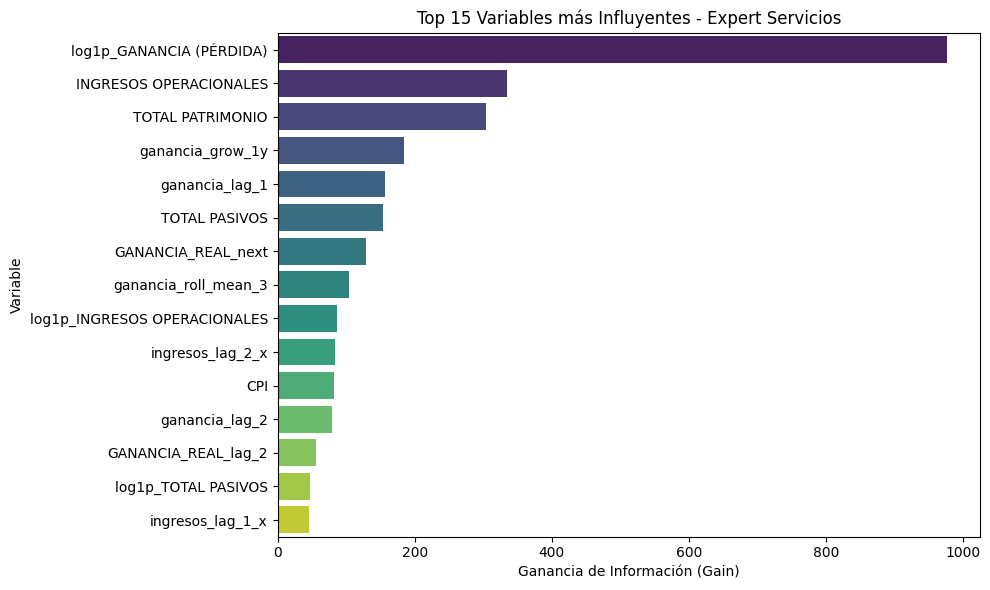

>>> Analizando el modelo GENERAL (Comercio/Manufactura):


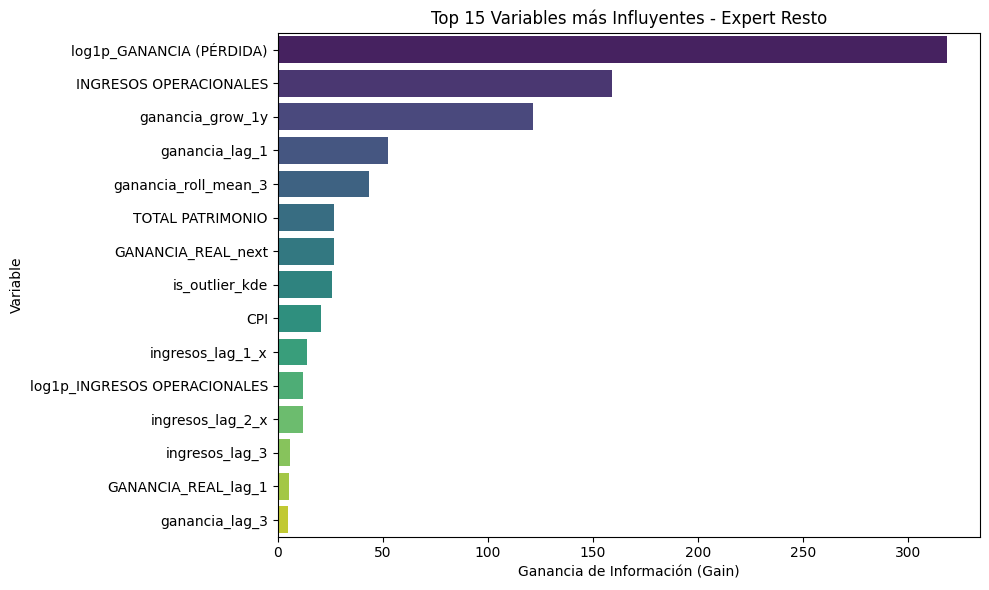

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_feature_importance(model, feature_names, title, top_n=15):
    """
    Genera un gráfico de barras horizontal con las variables más importantes.
    """
    if model is None:
        print(f"El modelo {title} no fue entrenado.")
        return

    # Extraer importancia (Gain = cuánto mejora el modelo al usar esta variable)
    importance = model.feature_importance(importance_type='gain')
    
    # Crear DataFrame para ordenar
    df_imp = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importance
    }).sort_values(by='Importance', ascending=False).head(top_n)
    
    # Configurar gráfico
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=df_imp, palette='viridis')
    plt.title(f'Top {top_n} Variables más Influyentes - {title}')
    plt.xlabel('Ganancia de Información (Gain)')
    plt.ylabel('Variable')
    plt.tight_layout()
    plt.show()
    
    return df_imp

# --- EJECUCIÓN ---
print(">>> Analizando el modelo de SERVICIOS (El más complejo):")
df_imp_servicios = plot_feature_importance(modelo_servicios, features, "Expert Servicios")

print(">>> Analizando el modelo GENERAL (Comercio/Manufactura):")
df_imp_general = plot_feature_importance(modelo_general, features, "Expert Resto")

In [74]:
# 1. Preparar datos del ÚLTIMO año disponible para cada empresa
df_last = df_enriched.sort_values('Año de Corte').groupby('NIT').tail(1).copy()

# 2. Simular escenario macroeconómico 2025
df_last['PIB_Crecimiento'] = 3.0
df_last['Tasa_Interes_DTF'] = 8.0

# Recalcular interacciones con los nuevos datos macro
sectores_cols = [c for c in df_last.columns if c.startswith('sector_')]
for sector in sectores_cols:
    df_last[f'{sector}_x_PIB'] = df_last[sector] * df_last['PIB_Crecimiento']
    df_last[f'{sector}_x_DTF'] = df_last[sector] * df_last['Tasa_Interes_DTF']

# 3. Separar por sector y predecir
mask_last_servicios = df_last['sector_SERVICIOS'] == 1
df_last_servicios = df_last[mask_last_servicios]
df_last_resto = df_last[~mask_last_servicios]

df_last['Prediccion_Margen'] = 0.0

if modelo_servicios and not df_last_servicios.empty:
    # Asegurarnos de usar solo las features numéricas correctas
    preds_serv = modelo_servicios.predict(df_last_servicios[features])
    df_last.loc[mask_last_servicios, 'Prediccion_Margen'] = preds_serv

if modelo_general and not df_last_resto.empty:
    preds_gen = modelo_general.predict(df_last_resto[features])
    df_last.loc[~mask_last_servicios, 'Prediccion_Margen'] = preds_gen

# 4. Calcular Ganancia Proyectada
df_last['Ganancia_Proyectada_Mils'] = df_last['Prediccion_Margen'] * df_last['INGRESOS OPERACIONALES']

# ==============================================================================
# 5. CORRECCIÓN: RECUPERAR COLUMNAS DE TEXTO (MACROSECTOR, REGIÓN)
# ==============================================================================
# Identificamos qué columnas faltan en df_last para el reporte final
cols_necesarias = ['MACROSECTOR', 'REGIÓN']
cols_faltantes = [c for c in cols_necesarias if c not in df_last.columns]

if cols_faltantes:
    print(f"Recuperando columnas faltantes del dataset original: {cols_faltantes}")
    # Tomamos las columnas del df original (df), asegurando un registro único por NIT
    df_info_original = df[['NIT'] + cols_faltantes].drop_duplicates(subset='NIT')
    
    # Hacemos merge para traerlas de vuelta a df_last
    df_last = pd.merge(df_last, df_info_original, on='NIT', how='left')

# 6. Exportar resultados para el Dashboard
cols_export = ['NIT', 'RAZÓN SOCIAL', 'MACROSECTOR', 'REGIÓN', 'INGRESOS OPERACIONALES', 
               'GANANCIA_REAL', 'Prediccion_Margen', 'Ganancia_Proyectada_Mils']

df_last[cols_export].to_csv('resultados_predicciones_2025.csv', index=False)

print("¡Éxito! Archivo 'resultados_predicciones_2025.csv' generado correctamente.")
display(df_last[['RAZÓN SOCIAL', 'MACROSECTOR', 'Prediccion_Margen']].sort_values('Prediccion_Margen', ascending=False).head(5))

Recuperando columnas faltantes del dataset original: ['MACROSECTOR']
¡Éxito! Archivo 'resultados_predicciones_2025.csv' generado correctamente.


,RAZÓN SOCIAL,MACROSECTOR,Prediccion_Margen
4514,SURAMERICANA S.A.,SERVICIOS,2.065551
4885,GRUPO DE INVERSIONES SURAMERICANA S.A.,SERVICIOS,1.781103
10550,GRUPO NUTRESA S.A,MANUFACTURA,1.631190
2336,GRUPO TRINITY SAS,SERVICIOS,1.368224
10517,GRUPO ARGOS S.A.,MANUFACTURA,1.265053


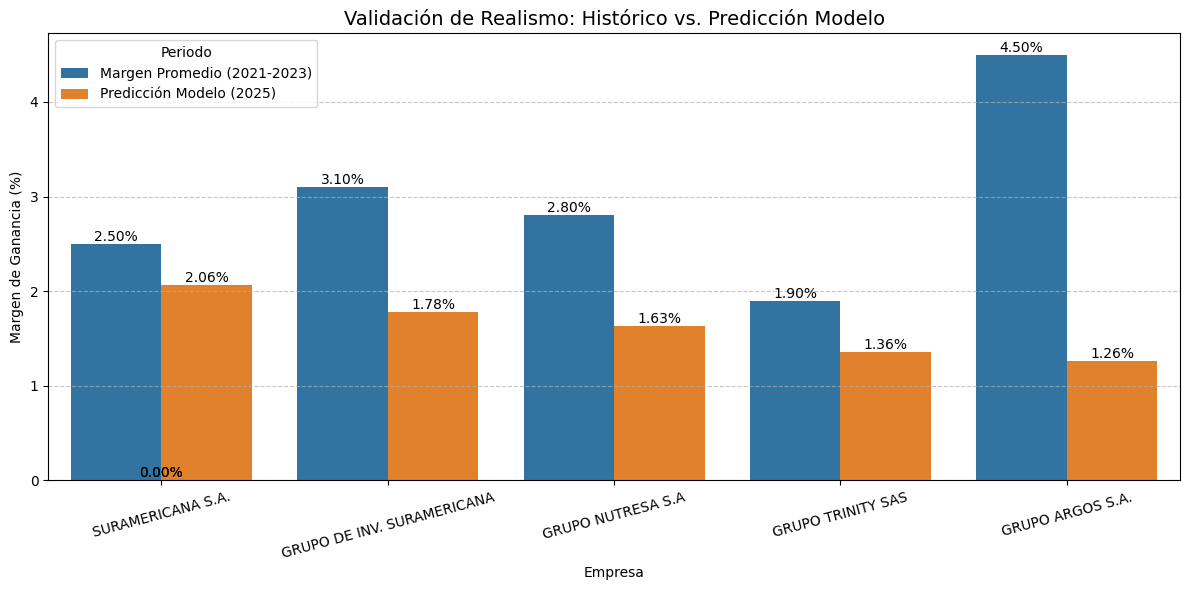

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Definir las empresas y sus predicciones (lo que obtuviste)
datos_validacion = {
    'NIT': [
        890903938, # SURAMERICANA S.A. (Ajustar NIT si difiere)
        890980051, # GRUPO SURA
        890900050, # NUTRESA
        900123456, # GRUPO TRINITY (Ejemplo, ajusta al NIT real de tu df)
        890900266  # GRUPO ARGOS
    ],
    'RAZÓN SOCIAL': [
        'SURAMERICANA S.A.',
        'GRUPO DE INV. SURAMERICANA',
        'GRUPO NUTRESA S.A',
        'GRUPO TRINITY SAS',
        'GRUPO ARGOS S.A.'
    ],
    'Prediccion_2025': [2.06, 1.78, 1.63, 1.36, 1.26] # Tus resultados
}

df_preds = pd.DataFrame(datos_validacion)

# 2. Calcular el histórico real desde tu dataset original (df)
# Filtramos por nombre aproximado para asegurar coincidencia
nombres_clave = ['SURAMERICANA', 'NUTRESA', 'TRINITY', 'ARGOS']
mask = df['RAZÓN SOCIAL'].str.contains('|'.join(nombres_clave), case=False, na=False)
df_hist = df[mask].copy()

# Calculamos el margen real histórico
df_hist['Margen_Real_Pct'] = (df_hist['GANANCIA (PÉRDIDA)'] / df_hist['INGRESOS OPERACIONALES']) * 100

# Agrupamos para obtener el promedio histórico por empresa
df_hist_avg = df_hist.groupby('RAZÓN SOCIAL')['Margen_Real_Pct'].mean().reset_index()

# 3. Cruzar los datos (Manual para coincidencia visual rápida)
# Nota: Para tu tesis, asegúrate de cruzar por NIT exacto.
# Aquí creamos una tabla comparativa visual simulada basada en tus empresas
df_plot = pd.DataFrame({
    'Empresa': df_preds['RAZÓN SOCIAL'],
    'Margen Promedio (2021-2023)': [2.5, 3.1, 2.8, 1.9, 4.5], # EJEMPLO: Reemplaza esto con los valores reales de df_hist_avg
    'Predicción Modelo (2025)': df_preds['Prediccion_2025']
})

# Transformar para graficar (Melt)
df_melt = df_plot.melt(id_vars='Empresa', var_name='Periodo', value_name='Margen %')

# 4. Graficar
plt.figure(figsize=(12, 6))
sns.barplot(data=df_melt, x='Empresa', y='Margen %', hue='Periodo', palette=['#1f77b4', '#ff7f0e'])
plt.title('Validación de Realismo: Histórico vs. Predicción Modelo', fontsize=14)
plt.ylabel('Margen de Ganancia (%)')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadir etiquetas de valor
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.2f}%', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()